In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

### Tiền xử lý transaction history

In [ ]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\transaction_history.csv", low_memory=False, index_col=0)
df.head()

stock_code transaction_date closing_price adjusted_price change_hisCost  \
0        ABC       01/02/2018          14.8          11.75  -0.6(-3.90 %)   
1        ABC       01/02/2019           9.2            7.3      0(0.00 %)   
2        ABC       01/02/2021          15.9          13.87  -0.4(-2.45 %)   
3        ABC       01/02/2023           7.2           6.28      0(0.00 %)   
4        ABC       01/02/2024          13.2          12.64  -0.2(-1.49 %)   

  matched_volume  matched_value negotiated_volume negotiated_value  \
0         32,900           0.49                 0                0   
1          4,310           0.04                 0                0   
2         10,000           0.16                 0                0   
3              0           0.00                 0                0   
4            811           0.01                 0                0   

  opening_price  ... sell_orders sell_volume avg_sell_volume_per_order  \
0          15.3  ...          49      48,200                       984   
1           9.2  ...          16      10,100                       631   
2            16  ...          64      60,200                       941   
3           7.2  ...           0           0                         0   
4          13.2  ...          26      36,700                     1,412   

  net_volume proprietary_buy_volume proprietary_buy_value  \
0     21,700                    NaN                   NaN   
1      5,600                    NaN                   NaN   
2    -18,500                    NaN                   NaN   
3          0                    NaN                   NaN   
4    -17,900                    NaN                   NaN   

  proprietary_sell_volume proprietary_sell_value proprietary_net_volume  \
0                     NaN                    NaN                    NaN   
1                     NaN                    NaN                    NaN   
2                     NaN                    NaN                    NaN   
3                     NaN                    NaN                    NaN   
4                     NaN                    NaN                    NaN   

  proprietary_net_value  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 36 columns]

In [123]:
df.shape

(168108, 36)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168108 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   stock_code                 168108 non-null  object 
 1   transaction_date           168108 non-null  object 
 2   closing_price              163607 non-null  object 
 3   adjusted_price             163607 non-null  object 
 4   change_hisCost             163607 non-null  object 
 5   matched_volume             163607 non-null  object 
 6   matched_value              163607 non-null  float64
 7   negotiated_volume          163607 non-null  object 
 8   negotiated_value           163607 non-null  object 
 9   opening_price              163607 non-null  object 
 10  highest_price              163607 non-null  object 
 11  lowest_price               163607 non-null  object 
 12  company_name_foriegnBlock  166111 non-null  object 
 13  change_foriegnBlock        166111 

Thay những giá trị bị thiếu của các cột ở bảng tự doanh = 0. Vì chỉ có một số ít các công ty tự doanh. 

In [125]:
df[['proprietary_buy_volume', 'proprietary_buy_value', 
    'proprietary_sell_volume', 'proprietary_sell_value', 
    'proprietary_net_volume', 'proprietary_net_value']] = df[
    ['proprietary_buy_volume', 'proprietary_buy_value', 
     'proprietary_sell_volume', 'proprietary_sell_value', 
     'proprietary_net_volume', 'proprietary_net_value']
].fillna(0)

In [126]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce', dayfirst=True)

In [127]:
df.dropna(subset=['transaction_date'], inplace=True) #Có một ngày vẫn bị lỗi nên cần xóa đi.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168107 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   stock_code                 168107 non-null  object        
 1   transaction_date           168107 non-null  datetime64[ns]
 2   closing_price              163607 non-null  object        
 3   adjusted_price             163607 non-null  object        
 4   change_hisCost             163607 non-null  object        
 5   matched_volume             163607 non-null  object        
 6   matched_value              163607 non-null  float64       
 7   negotiated_volume          163607 non-null  object        
 8   negotiated_value           163607 non-null  object        
 9   opening_price              163607 non-null  object        
 10  highest_price              163607 non-null  object        
 11  lowest_price               163607 non-null  object       

In [129]:
cols_to_convert = ['closing_price', 'adjusted_price', 'matched_volume', 
                   'matched_value', 'negotiated_volume', 'negotiated_value', 'opening_price',
                   'highest_price', 'lowest_price', 'foreign_net_volume', 'foreign_net_value',
                   'foreign_buy_volume', 'foreign_buy_value', 'foreign_sell_volume', 
                   'foreign_sell_value', 'remaining_room',
                   'buy_orders', 'buy_volume', 'avg_buy_volume_per_order',
                   'sell_orders', 'sell_volume', 'avg_sell_volume_per_order', 'net_volume']
len(cols_to_convert)

23

In [130]:
df.head(30)

stock_code transaction_date closing_price adjusted_price change_hisCost  \
0         ABC       2018-02-01          14.8          11.75  -0.6(-3.90 %)   
1         ABC       2019-02-01           9.2            7.3      0(0.00 %)   
2         ABC       2021-02-01          15.9          13.87  -0.4(-2.45 %)   
3         ABC       2023-02-01           7.2           6.28      0(0.00 %)   
4         ABC       2024-02-01          13.2          12.64  -0.2(-1.49 %)   
5         ABC       2017-03-01            35          15.67      0(0.00 %)   
6         ABC       2018-03-01          16.2          12.86    0.3(1.89 %)   
7         ABC       2019-03-01           9.6           7.62    0.2(2.13 %)   
8         ABC       2021-03-01          17.2             15    0.2(1.18 %)   
9         ABC       2022-03-01          11.7          10.21    0.1(0.86 %)   
10        ABC       2023-03-01          12.4          10.82      0(0.00 %)   
11        ABC       2024-03-01            13          12.45    0.1(0.78 %)   
12        ABC       2019-04-01          10.5           8.33   1.3(14.13 %)   
13        ABC       2020-04-01           8.2           7.15    0.1(1.23 %)   
14        ABC       2021-04-01            17          14.83  -0.1(-0.58 %)   
15        ABC       2022-04-01          11.3           9.86    0.1(0.89 %)   
16        ABC       2024-04-01            13          12.45  -0.3(-2.26 %)   
17        ABC       2017-06-01          33.4          14.95      0(0.00 %)   
18        ABC       2018-06-01           7.8           6.19  -0.1(-1.27 %)   
19        ABC       2020-06-01          10.2            8.9      0(0.00 %)   
20        ABC       2021-06-01          12.4          10.82  -0.4(-3.12 %)   
21        ABC       2022-06-01           8.3           7.24      0(0.00 %)   
22        ABC       2023-06-01          18.3          15.96      0(0.00 %)   
23        ABC       2019-07-01           9.5           8.29    0.5(5.56 %)   
24        ABC       2020-07-01          10.4           9.07      0(0.00 %)   
25        ABC       2021-07-01          12.4          10.82    0.3(2.48 %)   
26        ABC       2022-07-01           8.9           7.76    0.4(4.71 %)   
27        ABC       2024-07-01            16          15.33  -0.6(-3.61 %)   
28        ABC       2017-08-01            23          18.26  -0.1(-0.43 %)   
29        ABC       2018-08-01             7           5.56      0(0.00 %)   

   matched_volume  matched_value negotiated_volume negotiated_value  \
0          32,900           0.49                 0                0   
1           4,310           0.04                 0                0   
2          10,000           0.16                 0                0   
3               0           0.00                 0                0   
4             811           0.01                 0                0   
5           1,100           0.04                 0                0   
6          13,166           0.21                 0                0   
7           8,600           0.08                 0                0   
8          40,019           0.68                 0                0   
9          93,034           1.05                 0                0   
10              0           0.00                 0                0   
11          2,900           0.04                 0                0   
12        103,513           1.02                 0                0   
13          5,500           0.04                 0                0   
14        130,200           2.13                 0                0   
15         23,200           0.26                 0                0   
16          5,722           0.07                 0                0   
17              0           0.00                 0                0   
18          9,560           0.08                 0                0   
19          2,020           0.02                 0                0   
20         26,900           0.33                 0                0   
21              0     

In [131]:
for col in cols_to_convert:
    # Thay dấu ',' bằng '' để tránh lỗi chuyển đổi
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    
    # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168107 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   stock_code                 168107 non-null  object        
 1   transaction_date           168107 non-null  datetime64[ns]
 2   closing_price              163599 non-null  float64       
 3   adjusted_price             144449 non-null  float64       
 4   change_hisCost             163607 non-null  object        
 5   matched_volume             163607 non-null  float64       
 6   matched_value              163607 non-null  float64       
 7   negotiated_volume          163607 non-null  float64       
 8   negotiated_value           163607 non-null  float64       
 9   opening_price              163607 non-null  float64       
 10  highest_price              163607 non-null  float64       
 11  lowest_price               163607 non-null  float64      

In [133]:
df['foreign_ownership'] = df[col] = pd.to_numeric(df['foreign_ownership'].str.replace('%', '', regex=True), errors='coerce')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168107 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   stock_code                 168107 non-null  object        
 1   transaction_date           168107 non-null  datetime64[ns]
 2   closing_price              163599 non-null  float64       
 3   adjusted_price             144449 non-null  float64       
 4   change_hisCost             163607 non-null  object        
 5   matched_volume             163607 non-null  float64       
 6   matched_value              163607 non-null  float64       
 7   negotiated_volume          163607 non-null  float64       
 8   negotiated_value           163607 non-null  float64       
 9   opening_price              163607 non-null  float64       
 10  highest_price              163607 non-null  float64       
 11  lowest_price               163607 non-null  float64      

In [135]:
cols_convert = ['proprietary_buy_volume', 'proprietary_sell_volume', 'proprietary_net_volume']

In [136]:
for col in cols_convert:
    # Thay dấu ',' bằng '' để tránh lỗi chuyển đổi
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    
    # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [137]:
df.sort_values(by=['stock_code', 'transaction_date'], ascending=[True, True], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(20)

stock_code transaction_date  closing_price  adjusted_price change_hisCost  \
0         ABC       2016-08-18           39.7           17.77  11.2(39.30 %)   
1         ABC       2016-08-19           37.5           16.78  -1.7(-4.34 %)   
2         ABC       2016-08-22           36.0           16.11  -2.3(-6.01 %)   
3         ABC       2016-08-23           34.8           15.58  -1.8(-4.92 %)   
4         ABC       2016-08-24           35.0           15.67  -0.3(-0.85 %)   
5         ABC       2016-08-25           34.9           15.62      0(0.00 %)   
6         ABC       2016-08-26           34.7           15.53      0(0.00 %)   
7         ABC       2016-08-29           34.8           15.58    0.5(1.46 %)   
8         ABC       2016-08-30           34.5           15.44  -0.3(-0.86 %)   
9         ABC       2016-08-31           34.5           15.44    0.7(2.07 %)   
10        ABC       2016-09-01           34.6           15.49    0.1(0.29 %)   
11        ABC       2016-09-05           34.5           15.44  -0.1(-0.29 %)   
12        ABC       2016-09-06           33.8           15.13  -0.5(-1.46 %)   
13        ABC       2016-09-07           33.5           14.99  -0.3(-0.89 %)   
14        ABC       2016-09-08           33.5           14.99      0(0.00 %)   
15        ABC       2016-09-09           33.8           15.13    0.5(1.50 %)   
16        ABC       2016-09-12           33.8           15.13      0(0.00 %)   
17        ABC       2016-09-13           34.0           15.22    0.2(0.59 %)   
18        ABC       2016-09-14           33.5           14.99  -0.5(-1.47 %)   
19        ABC       2016-09-15           33.0           14.77  -0.5(-1.49 %)   

    matched_volume  matched_value  negotiated_volume  negotiated_value  \
0          25400.0           1.00                0.0               0.0   
1          23700.0           0.91                0.0               0.0   
2          13400.0           0.49                0.0               0.0   
3           5000.0           0.18                0.0               0.0   
4          16000.0           0.56                0.0               0.0   
5           4100.0           0.14                0.0               0.0   
6          11400.0           0.39                0.0               0.0   
7           1100.0           0.04                0.0               0.0   
8          10210.0           0.34                0.0               0.0   
9           1100.0           0.04                0.0               0.0   
10           100.0           0.00                0.0               0.0   
11          3100.0           0.11                0.0               0.0   
12          9000.0           0.30                0.0               0.0   
13           500.0           0.02                0.0               0.0   
14          8800.0           0.29                0.0               0.0   
15          5000.0           0.17                0.0               0.0   
16          5000.0           0.17                0.0               0.0   
17          1000.0           0.03                0.0               0.0   
18           500.0           0.02                0.0               0.0   
19           100.0           0.00                0.0               0.0   

    opening_price  ...  sell_orders  sell_volume avg_sell_volume_per_order  \
0            39.9  ...         39.0      27600.0                     708.0   
1            39.3  ...         36.0      39700.0                    1103.0   
2            38.0  ...         25.0      24200.0                     968.0   
3            36.0  ...         12.0      14000.0                    1167.0   
4            34.8  ...         10.0      30500.0                    3050.0   
5            34.6  ...         14.0      54900.0                    3921.0   
6            34.0  ...         18.0      27900.0                    1550.0   
7            34.8  ...          6.0      48200.0                    8033.0   
8            34.0  ...         13.0      23600.0                 

In [138]:
df[df['closing_price'].isna()]

stock_code transaction_date  closing_price  adjusted_price  \
887           ABC       2020-03-11            NaN             NaN   
1134          ABC       2021-03-08            NaN             NaN   
1158          ABC       2021-04-09            NaN             NaN   
1176          ABC       2021-05-10            NaN             NaN   
1334          ABC       2021-12-22            NaN             NaN   
...           ...              ...            ...             ...   
167038        YEG       2020-11-27            NaN             NaN   
168078        YEG       2025-02-03            NaN             NaN   
168104        YEG       2025-03-11            NaN             NaN   
168105        YEG       2025-03-12            NaN             NaN   
168106        YEG       2025-03-13            NaN             NaN   

       change_hisCost  matched_volume  matched_value  negotiated_volume  \
887               NaN             NaN            NaN                NaN   
1134              NaN             NaN            NaN                NaN   
1158              NaN             NaN            NaN                NaN   
1176              NaN             NaN            NaN                NaN   
1334              NaN             NaN            NaN                NaN   
...               ...             ...            ...                ...   
167038            NaN             NaN            NaN                NaN   
168078            NaN             NaN            NaN                NaN   
168104            NaN             NaN            NaN                NaN   
168105            NaN             NaN            NaN                NaN   
168106            NaN             NaN            NaN                NaN   

        negotiated_value  opening_price  ...  sell_orders  sell_volume  \
887                  NaN            NaN  ...          NaN          NaN   
1134                 NaN            NaN  ...         69.0      42200.0   
1158                 NaN            NaN  ...        108.0      78500.0   
1176                 NaN            NaN  ...         77.0      92200.0   
1334                 NaN            NaN  ...        358.0     304100.0   
...                  ...            ...  ...          ...          ...   
167038               NaN            NaN  ...         63.0     143160.0   
168078               NaN            NaN  ...       1184.0    3474700.0   
168104               NaN            NaN  ...       2734.0    9392900.0   
168105               NaN            NaN  ...          NaN          NaN   
168106               NaN            NaN  ...          NaN          NaN   

       avg_sell_volume_per_order net_volume  proprietary_buy_volume  \
887                          NaN      49.00                       0   
1134                       612.0       0.00                       0   
1158                       727.0       0.00                       0   
1176                      1197.0       0.00                       0   
1334                       849.0       0.00                       0   
...                          ...        ...                     ...   
167038                    2272.0      29.97                       0   
168078                    2935.0       0.00                       0   
168104                    3436.0       0.00                       0   
168105                       NaN       0.00                       0   
168106                       NaN       0.00                       0   

        proprietary_buy_value  proprietary_sell_volume  \
887                       0.0                        0   
1134                      0.0                        0   
1158                      0.0                        0   
1176                      0.0                        0   
1334                      0.0                        0   
...                       ...                      ...   
167038                    0.0                        0   
168078                    0.0                        0   
168104       

In [139]:
df.isna().sum()

stock_code                       0
transaction_date                 0
closing_price                 4508
adjusted_price               23658
change_hisCost                4500
matched_volume                4500
matched_value                 4500
negotiated_volume             4500
negotiated_value              4500
opening_price                 4500
highest_price                 4500
lowest_price                  4500
company_name_foriegnBlock     1997
change_foriegnBlock           1997
foreign_net_volume            1997
foreign_net_value             1997
foreign_buy_volume            1997
foreign_buy_value             1997
foreign_sell_volume           1997
foreign_sell_value            1997
remaining_room                1997
foreign_ownership             1999
change_orderStat              3621
buy_orders                    3621
buy_volume                    3621
avg_buy_volume_per_order      3621
sell_orders                   3621
sell_volume                   3621
avg_sell_volume_per_

### His cost

In [349]:
his_cost = pd.read_csv(r'/home/hamornic/FinalXXX/DataScraped/lịch_sử_giá.csv')
his_cost.head()

Stock_code               Tên công ty        Ngày     Giá đóng cửa  \
0        VIC  Tập đoàn VINGROUP - CTCP        Ngày  Giá (nghìn VNĐ)   
1        VIC  Tập đoàn VINGROUP - CTCP    Đóng cửa       Điều chỉnh   
2        VIC  Tập đoàn VINGROUP - CTCP  19/03/2025               --   
3        VIC  Tập đoàn VINGROUP - CTCP  18/03/2025             51.3   
4        VIC  Tập đoàn VINGROUP - CTCP  17/03/2025             52.1   

  Giá điều chỉnh          Thay đổi Khối lượng khớp lệnh Giá trị khớp lệnh  \
0       Thay đổi      GD khớp lệnh        GD thỏa thuận   Giá (nghìn VNĐ)   
1     Khối lượng  Giá trị (tỷ VNĐ)           Khối lượng  Giá trị (tỷ VNĐ)   
2             --                --            5,613,100            281.84   
3             --     -0.8(-1.54 %)            6,017,000            312.07   
4             --     -0.1(-0.19 %)            6,497,300            337.13   

  Khối lượng thỏa thuận Giá trị thỏa thuận Giá mở cửa  Giá cao nhất  \
0                   NaN                NaN        NaN           NaN   
1                Mở cửa           Cao nhất  Thấp nhất           NaN   
2                     0                  0       50.8          51.3   
3             1,923,099             100.19       52.1          52.7   
4               134,000               7.04       52.5          52.7   

   Giá thấp nhất  
0            NaN  
1            NaN  
2           49.2  
3           51.1  
4           50.8

In [350]:
his_cost = his_cost[(his_cost['Ngày'] != 'Ngày') & (his_cost['Ngày'] != 'Đóng cửa')]

In [351]:
his_cost.head()

Stock_code               Tên công ty        Ngày Giá đóng cửa  \
2        VIC  Tập đoàn VINGROUP - CTCP  19/03/2025           --   
3        VIC  Tập đoàn VINGROUP - CTCP  18/03/2025         51.3   
4        VIC  Tập đoàn VINGROUP - CTCP  17/03/2025         52.1   
5        VIC  Tập đoàn VINGROUP - CTCP  14/03/2025         52.2   
6        VIC  Tập đoàn VINGROUP - CTCP  13/03/2025         51.4   

  Giá điều chỉnh       Thay đổi Khối lượng khớp lệnh Giá trị khớp lệnh  \
2             --             --            5,613,100            281.84   
3             --  -0.8(-1.54 %)            6,017,000            312.07   
4             --  -0.1(-0.19 %)            6,497,300            337.13   
5             --    0.8(1.56 %)            8,422,600            440.87   
6             --    3.3(6.86 %)           16,415,000            833.85   

  Khối lượng thỏa thuận Giá trị thỏa thuận Giá mở cửa  Giá cao nhất  \
2                     0                  0       50.8          51.3   
3             1,923,099             100.19       52.1          52.7   
4               134,000               7.04       52.5          52.7   
5                     0                  0       51.8          52.8   
6                86,000               4.21       48.3          51.4   

   Giá thấp nhất  
2           49.2  
3           51.1  
4           50.8  
5           51.4  
6           47.5

In [352]:
his_cost.columns = ['stock_code', 'company_name', 'transaction_date', 'closing_price', 'adjusted_price','change', 'matched_volume', 'matched_value', 'negotiated_volume',
'negotiated_value',
'opening_price',
'highest_price',
'lowest_price']

In [353]:
his_cost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92865 entries, 2 to 102170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stock_code         92865 non-null  object 
 1   company_name       92865 non-null  object 
 2   transaction_date   92865 non-null  object 
 3   closing_price      92865 non-null  object 
 4   adjusted_price     92865 non-null  object 
 5   change             92865 non-null  object 
 6   matched_volume     92865 non-null  object 
 7   matched_value      92865 non-null  object 
 8   negotiated_volume  92865 non-null  object 
 9   negotiated_value   92865 non-null  object 
 10  opening_price      92865 non-null  object 
 11  highest_price      92865 non-null  float64
 12  lowest_price       92865 non-null  float64
dtypes: float64(2), object(11)
memory usage: 9.9+ MB


In [354]:
his_cost["transaction_date"] = pd.to_datetime(his_cost["transaction_date"], dayfirst=True)
numeric_cols = [
    "closing_price", "adjusted_price", 
    "matched_volume", "matched_value", 
    "negotiated_volume", "negotiated_value", "opening_price"
]

for col in numeric_cols:
    # Chuyển các cột số sang kiểu float
    his_cost[col] = his_cost[col].astype(str).str.replace(',', '', regex=True)

    # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    his_cost[col] = pd.to_numeric(his_cost[col], errors='coerce')


In [355]:
his_cost=his_cost[~his_cost['closing_price'].isna()]

In [356]:
his_cost.head()

stock_code              company_name transaction_date  closing_price  \
3        VIC  Tập đoàn VINGROUP - CTCP       2025-03-18           51.3   
4        VIC  Tập đoàn VINGROUP - CTCP       2025-03-17           52.1   
5        VIC  Tập đoàn VINGROUP - CTCP       2025-03-14           52.2   
6        VIC  Tập đoàn VINGROUP - CTCP       2025-03-13           51.4   
7        VIC  Tập đoàn VINGROUP - CTCP       2025-03-12           48.1   

   adjusted_price         change  matched_volume  matched_value  \
3             NaN  -0.8(-1.54 %)         6017000         312.07   
4             NaN  -0.1(-0.19 %)         6497300         337.13   
5             NaN    0.8(1.56 %)         8422600         440.87   
6             NaN    3.3(6.86 %)        16415000         833.85   
7             NaN    0.8(1.69 %)         7003400         336.19   

   negotiated_volume  negotiated_value  opening_price  highest_price  \
3            1923099            100.19          52.10          52.70   
4             134000              7.04          52.50          52.70   
5                  0              0.00          51.80          52.80   
6              86000              4.21          48.30          51.40   
7                  0              0.00          47.35          48.25   

   lowest_price  
3         51.10  
4         50.80  
5         51.40  
6         47.50  
7         47.35

In [357]:
his_cost = his_cost.drop_duplicates()

In [358]:
his_cost.describe()

transaction_date  closing_price  adjusted_price  \
count                          92746   92746.000000    80455.000000   
mean   2017-12-15 21:06:53.852888576      36.874797       17.926763   
min              2006-11-21 00:00:00       2.100000        1.120000   
25%              2014-02-07 00:00:00      15.100000        6.630000   
50%              2018-09-07 00:00:00      25.500000       11.610000   
75%              2022-02-10 00:00:00      46.100000       21.960000   
max              2025-03-19 00:00:00     665.000000      377.780000   
std                              NaN      36.281955       19.162240   

       matched_volume  matched_value  negotiated_volume  negotiated_value  \
count    9.274600e+04   92746.000000       9.274600e+04      92746.000000   
mean     1.799281e+06      59.650153       2.776879e+05         10.074131   
min      0.000000e+00       0.000000       0.000000e+00          0.000000   
25%      5.000000e+03       0.080000       0.000000e+00          0.000000   
50%      2.215100e+05       7.390000       0.000000e+00          0.000000   
75%      1.777802e+06      59.800000       8.000000e+00          0.000000   
max      7.658340e+07    5448.350000       4.149396e+08      30716.660000   
std      3.895112e+06     140.494858       2.658530e+06        143.976629   

       opening_price  highest_price  lowest_price  
count   92746.000000   92746.000000  92746.000000  
mean       36.865211      37.316882     36.396039  
min         0.000000       0.000000      0.000000  
25%        15.100000      15.300000     14.900000  
50%        25.500000      25.800000     25.100000  
75%        46.100000      46.800000     45.600000  
max       665.000000     672.000000    665.000000  
std        36.315907      36.704807     35.870991

In [359]:
his_cost['change']

3         -0.8(-1.54 %)
4         -0.1(-0.19 %)
5           0.8(1.56 %)
6           3.3(6.86 %)
7           0.8(1.69 %)
              ...      
102078    -0.7(-5.07 %)
102079    -0.2(-1.44 %)
102080      0.1(0.72 %)
102081    -0.4(-2.82 %)
102082    -0.6(-4.05 %)
Name: change, Length: 92746, dtype: object

In [360]:
his_cost[['change', 'percent']] = his_cost['change'].str.extract(r"([-\d.]+)\(([-\d.]+) %\)")

his_cost['change'] = his_cost['change'].astype(float)
his_cost['percent'] = his_cost['percent'].astype(float)

In [361]:
his_cost

stock_code                      company_name transaction_date  \
3             VIC          Tập đoàn VINGROUP - CTCP       2025-03-18   
4             VIC          Tập đoàn VINGROUP - CTCP       2025-03-17   
5             VIC          Tập đoàn VINGROUP - CTCP       2025-03-14   
6             VIC          Tập đoàn VINGROUP - CTCP       2025-03-13   
7             VIC          Tập đoàn VINGROUP - CTCP       2025-03-12   
...           ...                               ...              ...   
102078        LPB  Ngân hàng TMCP Lộc Phát Việt Nam       2017-10-11   
102079        LPB  Ngân hàng TMCP Lộc Phát Việt Nam       2017-10-10   
102080        LPB  Ngân hàng TMCP Lộc Phát Việt Nam       2017-10-09   
102081        LPB  Ngân hàng TMCP Lộc Phát Việt Nam       2017-10-06   
102082        LPB  Ngân hàng TMCP Lộc Phát Việt Nam       2017-10-05   

        closing_price  adjusted_price  change  matched_volume  matched_value  \
3                51.3             NaN    -0.8         6017000         312.07   
4                52.1             NaN    -0.1         6497300         337.13   
5                52.2             NaN     0.8         8422600         440.87   
6                51.4             NaN     3.3        16415000         833.85   
7                48.1             NaN     0.8         7003400         336.19   
...               ...             ...     ...             ...            ...   
102078           13.1            3.80    -0.7         1929895          25.69   
102079           13.7            3.97    -0.2         1369264          18.83   
102080           13.9            4.03     0.1         1018740          14.13   
102081           13.8            4.00    -0.4         1196846          16.49   
102082           14.2            4.11    -0.6         7293500         103.25   

        negotiated_volume  negotiated_value  opening_price  highest_price  \
3                 1923099            100.19          52.10          52.70   
4                  134000              7.04          52.50          52.70   
5                       0              0.00          51.80          52.80   
6                   86000              4.21          48.30          51.40   
7                       0              0.00          47.35          48.25   
...                   ...               ...            ...            ...   
102078               6602              0.08          13.80          13.80   
102079                  0              0.00          13.90          14.00   
102080             371030              4.98          13.80          14.00   
102081            1457311             17.74          14.20          14.20   
102082                  0              0.00          14.80          15.80   

        lowest_price  percent  
3              51.10    -1.54  
4              50.80    -0.19  
5              51.40     1.56  
6              47.50     6.86  
7              47.35     1.69  
...              ...      ...  
102078         12.90    -5.07  
102079         13.60    -1.44  
102080         13.70     0.72  
102081         13.60    -2.82  
102082         13.50    -4.05  

[92746 rows x 14 columns]

In [362]:
his_cost = his_cost.sort_values(by=["stock_code", "transaction_date"], ascending=[True, True])

In [363]:
his_cost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92746 entries, 100047 to 70742
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   stock_code         92746 non-null  object        
 1   company_name       92746 non-null  object        
 2   transaction_date   92746 non-null  datetime64[ns]
 3   closing_price      92746 non-null  float64       
 4   adjusted_price     80455 non-null  float64       
 5   change             92746 non-null  float64       
 6   matched_volume     92746 non-null  int64         
 7   matched_value      92746 non-null  float64       
 8   negotiated_volume  92746 non-null  int64         
 9   negotiated_value   92746 non-null  float64       
 10  opening_price      92746 non-null  float64       
 11  highest_price      92746 non-null  float64       
 12  lowest_price       92746 non-null  float64       
 13  percent            92746 non-null  float64       
dtypes: dat

In [150]:
#his_cost.to_csv(r'/home/hamornic/FinalXXX/DataScraped/Transaction History/Processed Data/History-Cost.csv', index=False, encoding='utf-8-sig')

In [364]:
df_monthly = his_cost.groupby([
    'stock_code',
    pd.Grouper(key='transaction_date', freq='ME')  
]).agg({
    'closing_price': ['sum', 'mean'],  
    'matched_volume': ['sum', 'mean']
}).reset_index()

In [214]:
df_monthly

stock_code transaction_date closing_price             matched_volume  \
                                           sum        mean            sum   
0           ACB       2006-11-30        697.00  139.400000         250900   
1           ACB       2006-12-31       2543.60  141.311111        1028100   
2           ACB       2007-01-31       3790.60  172.300000        1611200   
3           ACB       2007-02-28       2913.10  208.078571        1061100   
4           ACB       2007-03-31       5821.70  264.622727        2277100   
...         ...              ...           ...         ...            ...   
4503        VTB       2024-11-30        221.50   10.547619          45400   
4504        VTB       2024-12-31        239.55   10.888636         384500   
4505        VTB       2025-01-31        169.50    9.970588          78400   
4506        VTB       2025-02-28        192.32   10.122105          43700   
4507        VTB       2025-03-31        131.65   10.126923          16700   

                     
               mean  
0      50180.000000  
1      57116.666667  
2      73236.363636  
3      75792.857143  
4     103504.545455  
...             ...  
4503    2161.904762  
4504   17477.272727  
4505    4611.764706  
4506    2300.000000  
4507    1284.615385  

[4508 rows x 6 columns]

In [365]:
df_quarterly = his_cost.groupby([  
    'stock_code',  
    pd.Grouper(key='transaction_date', freq='QE')  
]).agg({  
    'closing_price': ['sum', 'mean'],  
    'matched_volume': ['sum', 'mean']
}).reset_index()

In [366]:
df_quarterly

stock_code transaction_date closing_price             matched_volume  \
                                           sum        mean            sum   
0           ACB       2006-12-31       3240.60  140.895652        1279000   
1           ACB       2007-03-31      12525.40  215.955172        4949400   
2           ACB       2007-06-30      11051.20  181.167213        5993900   
3           ACB       2007-09-30       7859.00  122.796875       10180700   
4           ACB       2007-12-31      11044.20  169.910769       19209600   
...         ...              ...           ...         ...            ...   
1512        VTB       2024-03-31        636.85   10.794068         493400   
1513        VTB       2024-06-30        643.90   10.555738         333900   
1514        VTB       2024-09-30        678.25   10.597656         117400   
1515        VTB       2024-12-31        700.20   10.609091         504000   
1516        VTB       2025-03-31        493.47   10.070816         138800   

                     
               mean  
0      55608.695652  
1      85334.482759  
2      98260.655738  
3     159073.437500  
4     295532.307692  
...             ...  
1512    8362.711864  
1513    5473.770492  
1514    1834.375000  
1515    7636.363636  
1516    2832.653061  

[1517 rows x 6 columns]

In [367]:
df_quarterly['stock_code'].unique().size

32

In [368]:
df_quarterly.describe()

transaction_date closing_price               \
                                               sum         mean   
count                           1517   1517.000000  1517.000000   
mean   2018-01-07 05:24:38.444297984   2254.442920    37.604955   
min              2006-12-31 00:00:00     60.000000     2.760000   
25%              2013-12-31 00:00:00    927.050000    15.124242   
50%              2018-09-30 00:00:00   1565.200000    25.643878   
75%              2022-03-31 00:00:00   2850.000000    46.483051   
max              2025-03-31 00:00:00  33336.000000   574.758621   
std                              NaN   2163.856958    37.833768   

      matched_volume                
                 sum          mean  
count   1.517000e+03  1.517000e+03  
mean    1.100040e+08  1.786361e+06  
min     0.000000e+00  0.000000e+00  
25%     5.288230e+05  8.993621e+03  
50%     1.632170e+07  2.618103e+05  
75%     1.207566e+08  1.990674e+06  
max     1.610636e+09  2.597800e+07  
std     2.065928e+08  3.346055e+06

### EDA

In [333]:
his_cost.head()

stock_code           company_name transaction_date  closing_price  \
100047        ACB  Ngân hàng TMCP Á Châu       2006-11-21          135.0   
100046        ACB  Ngân hàng TMCP Á Châu       2006-11-22          135.0   
100045        ACB  Ngân hàng TMCP Á Châu       2006-11-23          143.0   
100044        ACB  Ngân hàng TMCP Á Châu       2006-11-27          142.0   
100043        ACB  Ngân hàng TMCP Á Châu       2006-11-28          142.0   

        adjusted_price  change  matched_volume  matched_value  \
100047            5.72    15.0           56500           7.37   
100046            5.72     4.8           62300           8.39   
100045            6.06     8.3           69900           9.68   
100044            6.02    -4.8           42400           6.23   
100043            6.02    -4.8           19800           2.84   

        negotiated_volume  negotiated_value  opening_price  highest_price  \
100047                  0               0.0          120.0          150.0   
100046                  0               0.0          143.2          143.2   
100045                  0               0.0          145.0          145.0   
100044                  0               0.0          146.8          161.4   
100043                  0               0.0          150.0          150.0   

        lowest_price  percent  
100047         119.0    12.50  
100046         130.0     3.69  
100045         130.0     6.16  
100044         135.0    -3.27  
100043         140.0    -3.27

In [334]:
stock_info = pd.read_csv(r'/home/hamornic/FinalXXX/stock.csv')
stock_info.head()

Stock         Ngành                                        Tên công ty
0   VIC  Bất Động Sản                           Tập đoàn VINGROUP - CTCP
1   VHM  Bất Động Sản                                      CTCP Vinhomes
2   BCM  Bất Động Sản  Tổng Công ty Đầu tư và Phát triển Công nghiệp ...
3   SSH  Bất Động Sản                     CTCP Phát triển Sunshine Homes
4   VRE  Bất Động Sản                                 CTCP Vincom Retail

In [335]:
stock_info.rename(columns={'Stock':'stock_code'}, inplace=True)

In [336]:
stock_info.head()

stock_code         Ngành                                        Tên công ty
0        VIC  Bất Động Sản                           Tập đoàn VINGROUP - CTCP
1        VHM  Bất Động Sản                                      CTCP Vinhomes
2        BCM  Bất Động Sản  Tổng Công ty Đầu tư và Phát triển Công nghiệp ...
3        SSH  Bất Động Sản                     CTCP Phát triển Sunshine Homes
4        VRE  Bất Động Sản                                 CTCP Vincom Retail

In [337]:
his_cost = pd.merge(his_cost, stock_info, on='stock_code', how='inner')
his_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92746 entries, 0 to 92745
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   stock_code         92746 non-null  object        
 1   company_name       92746 non-null  object        
 2   transaction_date   92746 non-null  datetime64[ns]
 3   closing_price      92746 non-null  float64       
 4   adjusted_price     80455 non-null  float64       
 5   change             92746 non-null  float64       
 6   matched_volume     92746 non-null  int64         
 7   matched_value      92746 non-null  float64       
 8   negotiated_volume  92746 non-null  int64         
 9   negotiated_value   92746 non-null  float64       
 10  opening_price      92746 non-null  float64       
 11  highest_price      92746 non-null  float64       
 12  lowest_price       92746 non-null  float64       
 13  percent            92746 non-null  float64       
 14  Ngành 

In [338]:
his_cost.drop(columns=['Tên công ty'], inplace=True)

----

#### EDA cơ bản

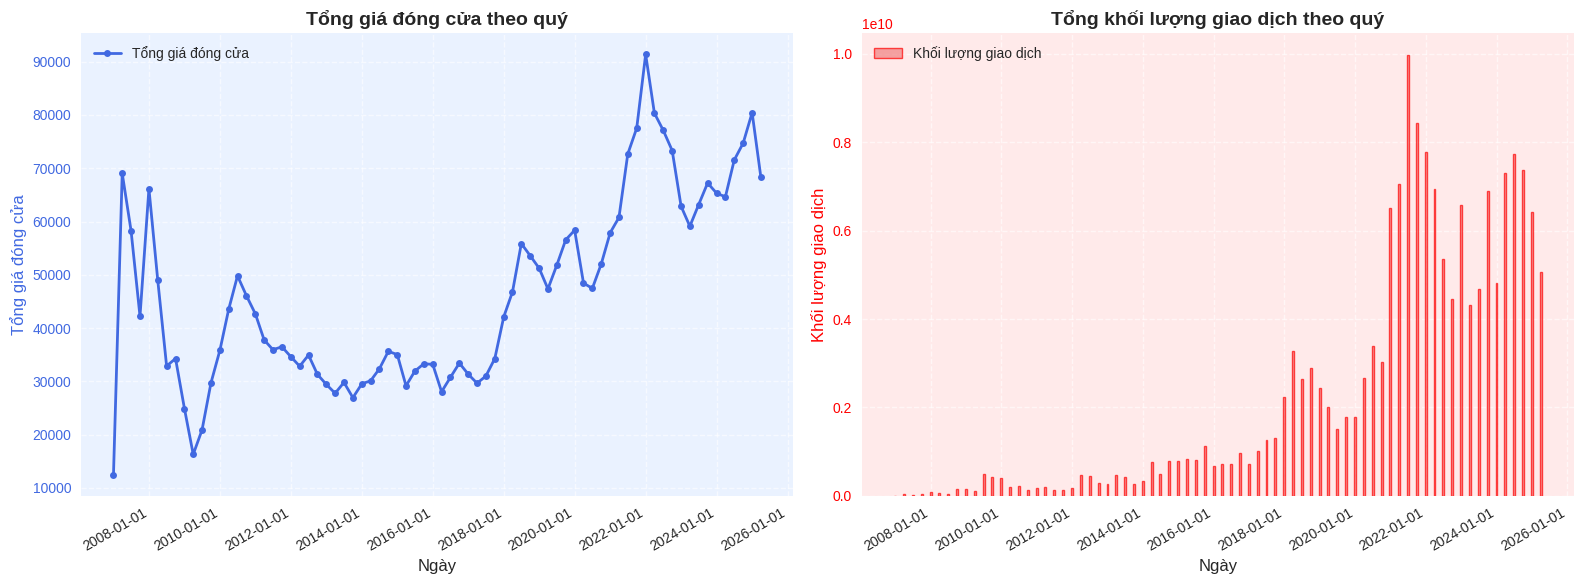

In [342]:
import matplotlib.dates as mdates
# Group by transaction_date trước khi vẽ
df_grouped = df_quarterly.groupby("transaction_date").agg({
    ("closing_price", "sum"): "sum",
    ("matched_volume", "sum"): "sum"
}).reset_index()

# Tạo figure và axes (2 biểu đồ cạnh nhau)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Đặt màu nền tổng thể
fig.patch.set_facecolor("#ffffff")

# Biểu đồ 1: Tổng giá đóng cửa (closing_price[sum])
axes[0].plot(df_grouped["transaction_date"], df_grouped[("closing_price", "sum")], 
             linestyle="-", color="royalblue", marker="o", markersize=5, linewidth=2, label="Tổng giá đóng cửa")

axes[0].set_xlabel("Ngày", fontsize=12)
axes[0].set_ylabel("Tổng giá đóng cửa", fontsize=12, color="royalblue")
axes[0].tick_params(axis="y", labelcolor="royalblue")
axes[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
axes[0].set_title("Tổng giá đóng cửa theo quý", fontsize=14, fontweight="bold")
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].legend()
axes[0].set_facecolor("#eaf2ff")  # Màu nền nhẹ xanh dương

# Biểu đồ 2: Tổng khối lượng giao dịch (matched_volume[sum])
axes[1].bar(df_grouped["transaction_date"], df_grouped[("matched_volume", "sum")], 
            color="lightcoral", alpha=0.7, edgecolor="red", linewidth=1, width=20, label="Khối lượng giao dịch")

axes[1].set_xlabel("Ngày", fontsize=12)
axes[1].set_ylabel("Khối lượng giao dịch", fontsize=12, color="red")
axes[1].tick_params(axis="y", labelcolor="red")
axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
axes[1].set_title("Tổng khối lượng giao dịch theo quý", fontsize=14, fontweight="bold")
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].legend()
axes[1].set_facecolor("#ffeaea")  # Màu nền nhẹ đỏ nhạt

# Tự động căn chỉnh ngày cho trục x
fig.autofmt_xdate(rotation=30, ha="right")

plt.tight_layout()  # Căn chỉnh bố cục cho đẹp
plt.show()

Từ biểu đồ, có thể thấy rằng tổng giá đóng cửa và khối lượng giao dịch của các mã thu thập được có xu hướng tăng dần theo thời gian, đặc biệt từ năm 2017 2018 trở đi. Giai đoạn 2020 - 2024 chứng kiến sự tăng trưởng mạnh cả về giá lẫn khối lượng giao dịch, cho thấy sự mở rộng của thị trường hoặc tác động từ các yếu tố kinh tế quan trọng. Tuy nhiên, sau khi đạt đỉnh, khối lượng giao dịch có dấu hiệu giảm nhẹ, có thể phản ánh sự điều chỉnh của thị trường.

In [301]:
import numpy as np

In [344]:
his_cost.head()

stock_code           company_name transaction_date  closing_price  \
0        ACB  Ngân hàng TMCP Á Châu       2006-11-21          135.0   
1        ACB  Ngân hàng TMCP Á Châu       2006-11-22          135.0   
2        ACB  Ngân hàng TMCP Á Châu       2006-11-23          143.0   
3        ACB  Ngân hàng TMCP Á Châu       2006-11-27          142.0   
4        ACB  Ngân hàng TMCP Á Châu       2006-11-28          142.0   

   adjusted_price  change  matched_volume  matched_value  negotiated_volume  \
0            5.72    15.0           56500           7.37                  0   
1            5.72     4.8           62300           8.39                  0   
2            6.06     8.3           69900           9.68                  0   
3            6.02    -4.8           42400           6.23                  0   
4            6.02    -4.8           19800           2.84                  0   

   negotiated_value  opening_price  highest_price  lowest_price  percent  \
0               0.0          120.0          150.0         119.0    12.50   
1               0.0          143.2          143.2         130.0     3.69   
2               0.0          145.0          145.0         130.0     6.16   
3               0.0          146.8          161.4         135.0    -3.27   
4               0.0          150.0          150.0         140.0    -3.27   

       Ngành  
0  Ngân hàng  
1  Ngân hàng  
2  Ngân hàng  
3  Ngân hàng  
4  Ngân hàng

In [345]:
df_quarterly = his_cost.groupby([  
    'Ngành',  
    pd.Grouper(key='transaction_date', freq='QE')  
]).agg({  
    'closing_price': 'sum',  
    'matched_volume': 'sum'
}).reset_index()

In [346]:
df_quarterly.sort_values(by=['Ngành','transaction_date'],ascending=[True, True])

Ngành transaction_date  closing_price  matched_volume
0    Bất Động Sản       2007-09-30        1150.00         6018590
1    Bất Động Sản       2007-12-31       12483.80        20515860
2    Bất Động Sản       2008-03-31       16814.30         8842510
3    Bất Động Sản       2008-06-30       14972.90         7009130
4    Bất Động Sản       2008-09-30       13520.30        12067730
..            ...              ...            ...             ...
288    Năng Lượng       2024-03-31       11872.20       677663208
289    Năng Lượng       2024-06-30       14112.45       737102119
290    Năng Lượng       2024-09-30       15175.50       388792101
291    Năng Lượng       2024-12-31       19148.65       355620765
292    Năng Lượng       2025-03-31       22661.70       409069111

[293 rows x 4 columns]

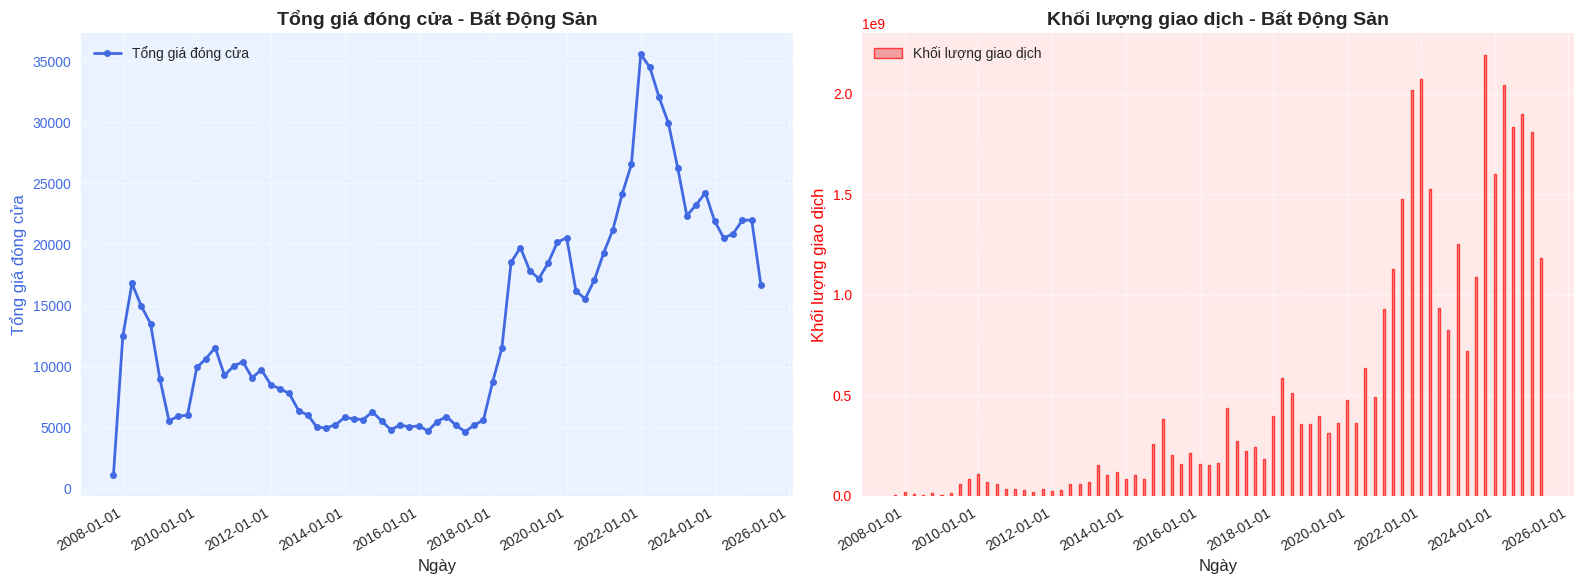

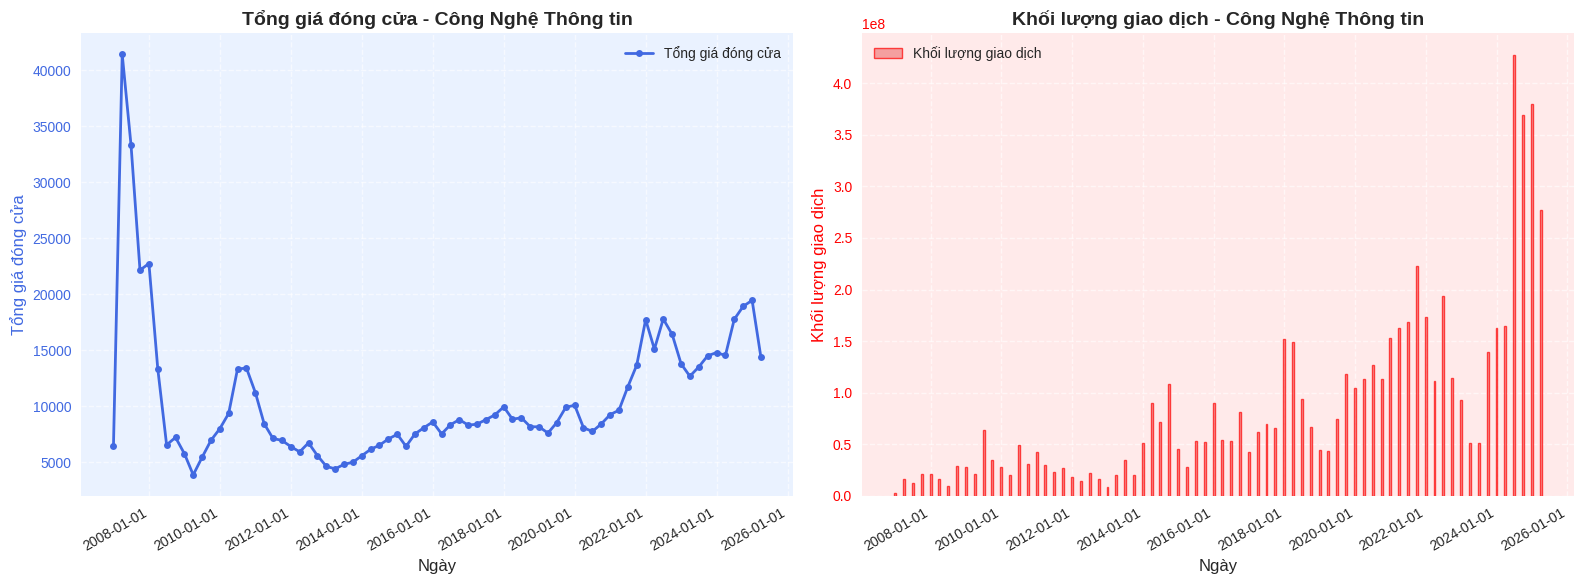

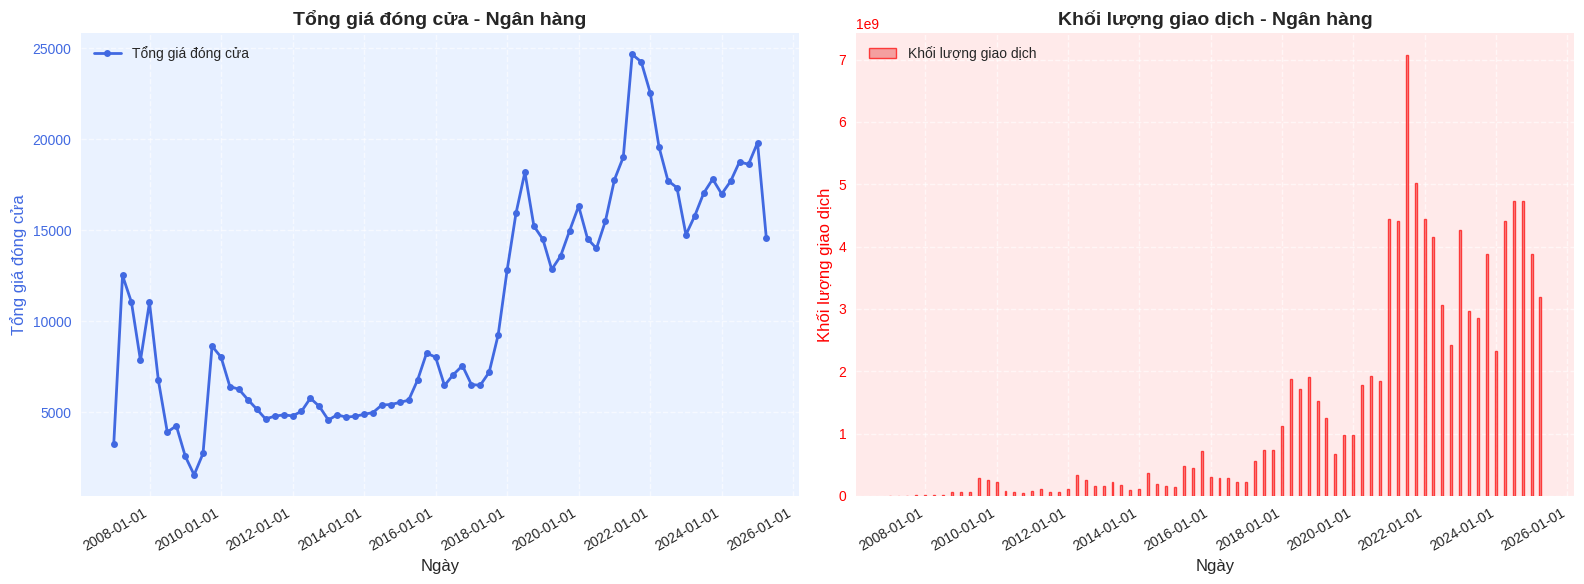

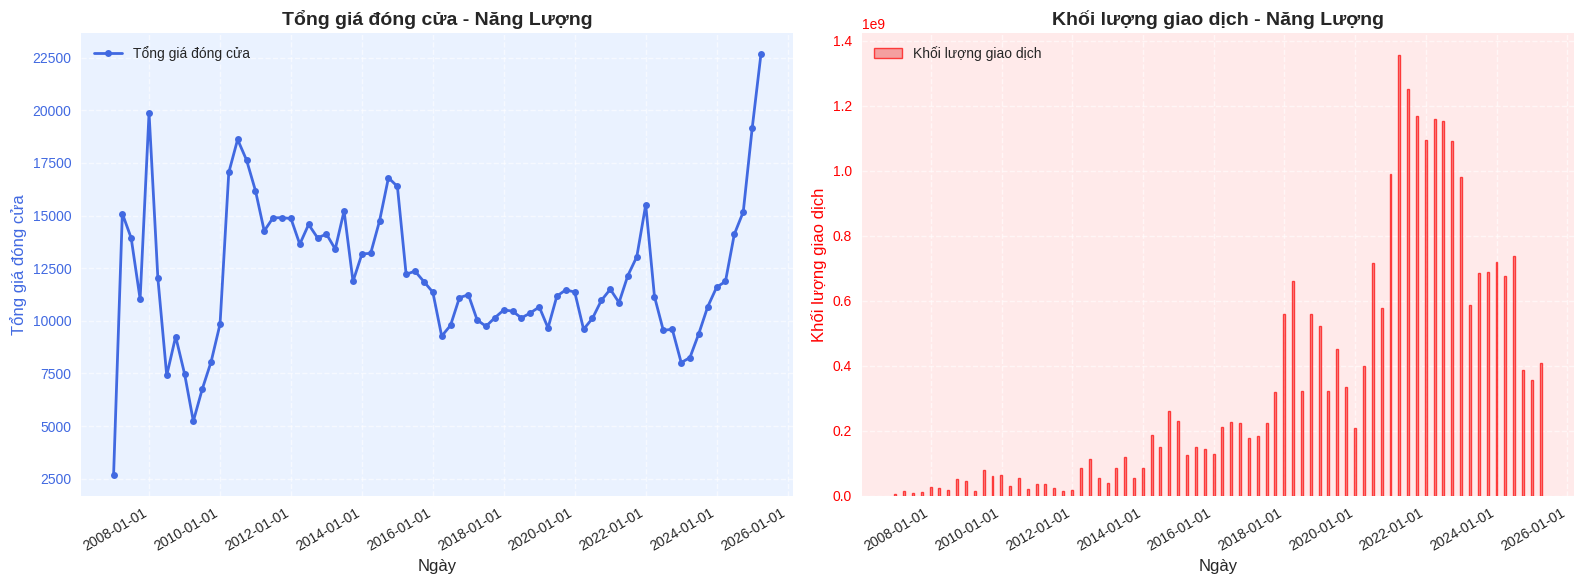

In [347]:
import matplotlib.dates as mdates

# Lấy danh sách các ngành
unique_sectors = df_quarterly["Ngành"].unique()

for sector in unique_sectors:
    df_sector = df_quarterly[df_quarterly["Ngành"] == sector]

    # Group by transaction_date trước khi vẽ
    df_grouped = df_sector.groupby("transaction_date").agg({
        "closing_price": "sum",
        "matched_volume": "sum"
    }).reset_index()

    # Tạo figure và axes (2 biểu đồ cạnh nhau)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Đặt màu nền tổng thể
    fig.patch.set_facecolor("#ffffff")

    # Biểu đồ 1: Tổng giá đóng cửa (closing_price)
    axes[0].plot(df_grouped["transaction_date"], df_grouped["closing_price"], 
                 linestyle="-", color="royalblue", marker="o", markersize=5, linewidth=2, label="Tổng giá đóng cửa")

    axes[0].set_xlabel("Ngày", fontsize=12)
    axes[0].set_ylabel("Tổng giá đóng cửa", fontsize=12, color="royalblue")
    axes[0].tick_params(axis="y", labelcolor="royalblue")
    axes[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    axes[0].set_title(f"Tổng giá đóng cửa - {sector}", fontsize=14, fontweight="bold")
    axes[0].grid(True, linestyle="--", alpha=0.6)
    axes[0].legend()
    axes[0].set_facecolor("#eaf2ff")  # Màu nền nhẹ xanh dương

    # Biểu đồ 2: Tổng khối lượng giao dịch (matched_volume)
    axes[1].bar(df_grouped["transaction_date"], df_grouped["matched_volume"], 
                color="lightcoral", alpha=0.7, edgecolor="red", linewidth=1, width=20, label="Khối lượng giao dịch")

    axes[1].set_xlabel("Ngày", fontsize=12)
    axes[1].set_ylabel("Khối lượng giao dịch", fontsize=12, color="red")
    axes[1].tick_params(axis="y", labelcolor="red")
    axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    axes[1].set_title(f"Khối lượng giao dịch - {sector}", fontsize=14, fontweight="bold")
    axes[1].grid(True, linestyle="--", alpha=0.6)
    axes[1].legend()
    axes[1].set_facecolor("#ffeaea")  # Màu nền nhẹ đỏ nhạt

    # Tự động căn chỉnh ngày cho trục x
    fig.autofmt_xdate(rotation=30, ha="right")

    plt.tight_layout()  # Căn chỉnh bố cục cho đẹp
    plt.show()


In [63]:
df_first_trade = his_cost.iloc[his_cost.groupby('stock_code')['transaction_date'].idxmin()]
df_first_trade.head()

stock_code                                       company_name  \
0           ACB                              Ngân hàng TMCP Á Châu   
4558        BCM  Tổng Công ty Đầu tư và Phát triển Công nghiệp ...   
6315        BID       Ngân hàng TMCP Đầu tư và Phát triển Việt Nam   
9092        BSR                          CTCP Lọc hóa Dầu Bình Sơn   
9128        CMG                         TCP Tập đoàn Công nghệ CMC   

     transaction_date  closing_price  adjusted_price  change  matched_volume  \
0          2006-11-21         135.00            5.72   15.00           56500   
4558       2018-02-21          25.00           22.86   -6.00           81200   
6315       2014-01-24          18.80            8.14    0.10         8417060   
9092       2025-01-20          21.05             NaN   -0.55         3740500   
9128       2010-01-22          35.00           10.94    0.00          117370   

      matched_value  negotiated_volume  negotiated_value  opening_price  \
0              7.37                  0               0.0          120.0   
4558           2.06                  0               0.0           29.6   
6315         159.07                  0               0.0           19.0   
9092          79.11                  0               0.0           21.6   
9128           3.97                  0               0.0           35.0   

      highest_price  lowest_price  percent                Ngành  
0            150.00         119.0    12.50            Ngân hàng  
4558          29.60          25.0   -19.35         Bất Động Sản  
6315          19.50          18.5     0.53            Ngân hàng  
9092          21.65          21.0    -2.55           Năng Lượng  
9128          35.00          28.5     0.00  Công Nghệ Thông tin

In [64]:
df_first_trade['transaction_date'].describe()

count                     32
mean     2013-07-15 18:45:00
min      2006-11-21 00:00:00
25%      2009-02-10 00:00:00
50%      2010-04-29 12:00:00
75%      2018-03-14 06:00:00
max      2025-02-10 00:00:00
Name: transaction_date, dtype: object

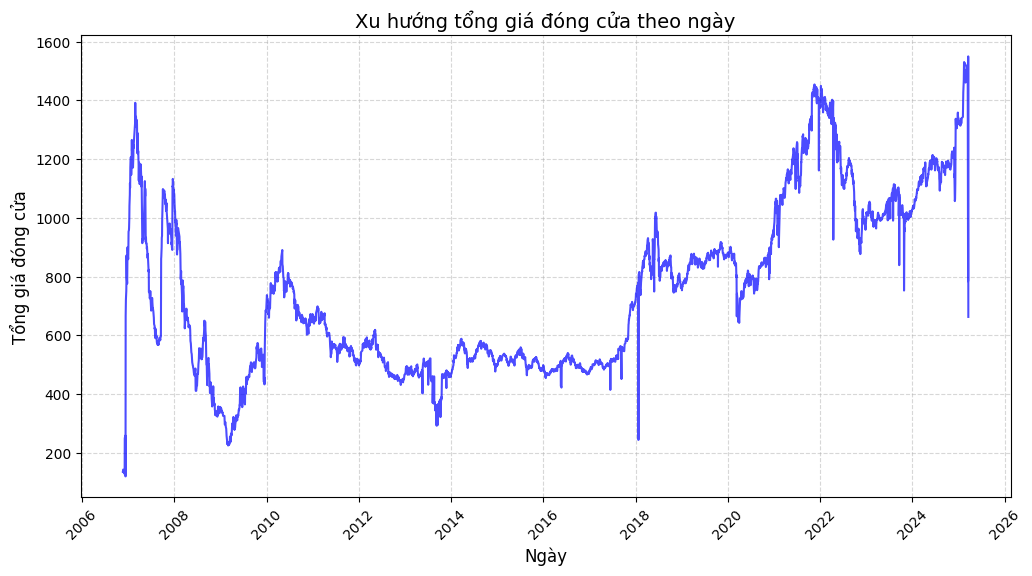

In [65]:
df_grouped = his_cost.groupby("transaction_date")["closing_price"].sum()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, linestyle="-", color="b", alpha=0.7)

plt.title("Xu hướng tổng giá đóng cửa theo ngày", fontsize=14)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Tổng giá đóng cửa", fontsize=12)
plt.xticks(rotation=45)  

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

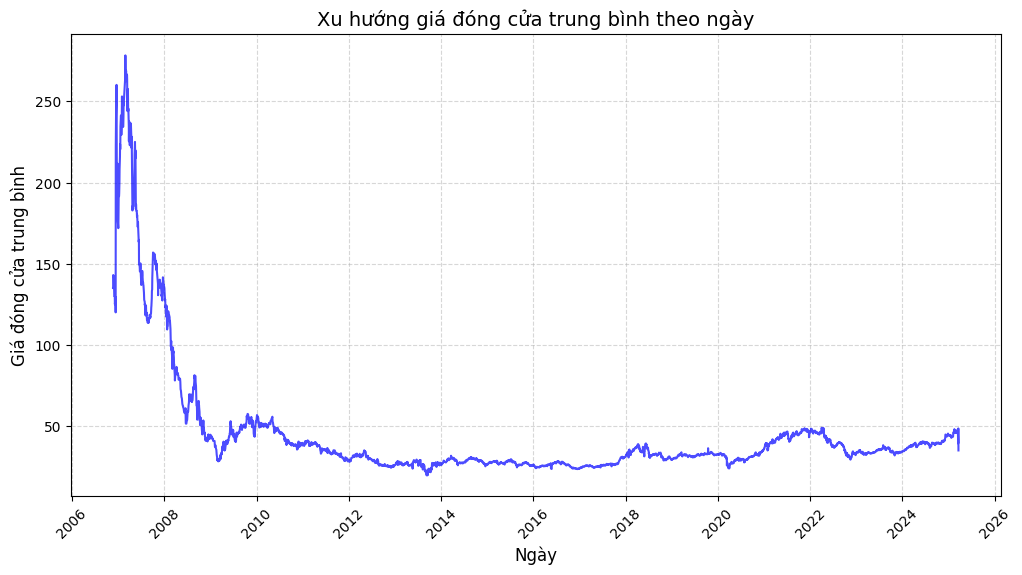

In [66]:
df_grouped = his_cost.groupby("transaction_date")["closing_price"].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, linestyle="-", color="b", alpha=0.7)

plt.title("Xu hướng giá đóng cửa trung bình theo ngày", fontsize=14)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Giá đóng cửa trung bình", fontsize=12)
plt.xticks(rotation=45)  

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Do có 75% mã cổ phiếu có lịch sử giao dịch sớm nhất trong dữ liệu crawl được <= tháng 3 năm 2018 và trên biểu đồ về giá trung bình có thể thấy được giá cổ phiếu có xu hướng biến động nhiều từ năm 2006 đến 2011, 2012 và từ 2012 thì có vẻ ít biến động hơn nên ta có thể  chọn những mã có thời gian từ **tháng 4 năm 2018** và biểu đồ tổng giá đóng cửa cũng có xu hướng tăng hàng năm từ năm 2018 trở đi.

In [372]:
his_cost = his_cost[his_cost['transaction_date'].dt.year >= 2018]

In [69]:
df_grouped = his_cost.groupby("stock_code").agg({'closing_price': 'mean', 'matched_volume':'sum'})
df_grouped.head()

closing_price  matched_volume
stock_code                               
ACB             28.137012     10066452866
BCM             50.880336       403343303
BID             40.533806      3468078160
BSR             20.145833       113954900
CMG             40.786060       468511590

In [74]:
df_grouped

closing_price  matched_volume
stock_code                               
ACB             28.137012     10066452866
BCM             50.880336       403343303
BID             40.533806      3468078160
BSR             20.145833       113954900
CMG             40.786060       468511590
CMT             13.424624        24507177
CST             23.237037         2260350
CTG             29.166639     12349955330
FPT             78.693263      3747175100
HGM             52.681159         1877331
HPT             12.327818         3149142
ITD             12.200195       205193910
KBC             25.562765      9482763460
KDH             32.521186      2703168020
KSF             57.770175        48034888
LPB             15.966603      9856289252
MBB             23.430913     18698469570
MVB             14.869709         5431144
PIA             27.431786          525602
POT             18.050530         4041125
PVD             20.678886      9345990240
PVS             25.468838     11091405096
SQC             51.891465         2105146
SSH             76.341190       155708023
TCB             32.406095     12539867740
TMB             28.988784        15372877
VCB             82.645242      2431020240
VHM             71.053482      6766755970
VIC             83.472884      3924968100
VPB             28.260045     19291112690
VRE             29.948497      7893240300
VTB             12.727190        10443570

In [70]:
df_grouped.describe()

closing_price  matched_volume
count      32.000000    3.200000e+01
mean       36.303126    4.535037e+09
std        22.072127    5.779378e+09
min        12.200195    5.256020e+05
25%        20.545623    1.414055e+07
50%        28.624414    1.449766e+09
75%        51.133118    9.380184e+09
max        83.472884    1.929111e+10

In [72]:
import numpy as np

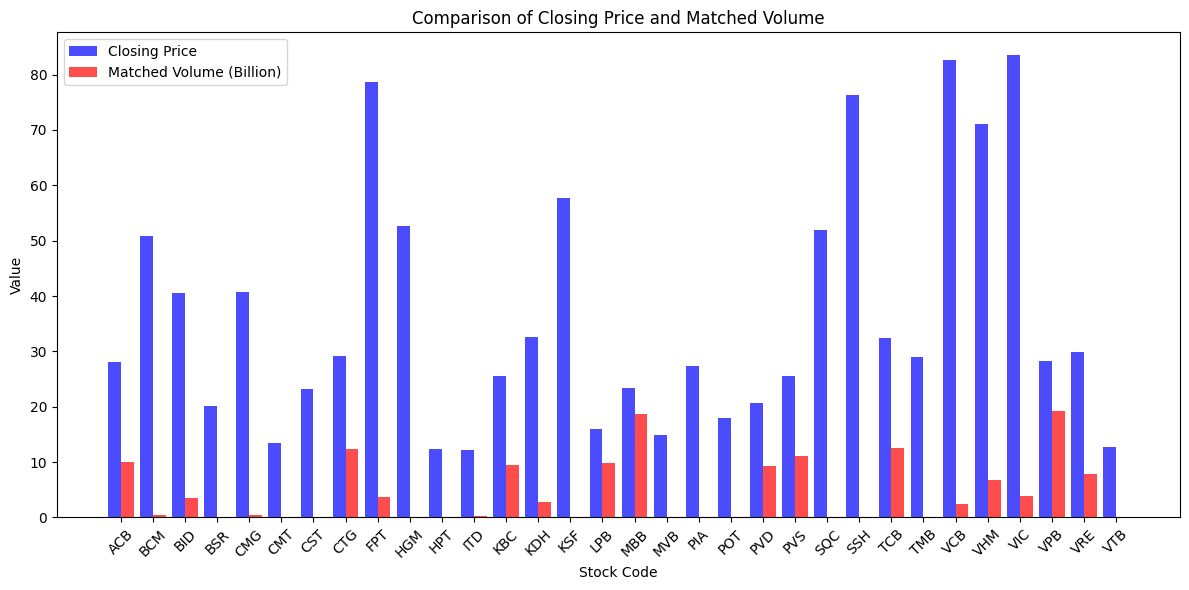

In [76]:

# Giả sử df_grouped đã có dữ liệu
stock_codes = df_grouped.index
closing_prices = df_grouped["closing_price"]
matched_volumes = df_grouped["matched_volume"]

x = np.arange(len(stock_codes))  # Tạo vị trí cho các cột
width = 0.4  # Độ rộng của mỗi cột

fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ cột cho closing_price
bars1 = ax.bar(x - width/2, closing_prices, width, label="Closing Price", color="b", alpha=0.7)

# Vẽ cột cho matched_volume (chuẩn hóa để hiển thị dễ dàng hơn)
bars2 = ax.bar(x + width/2, matched_volumes / 1e9, width, label="Matched Volume (Billion)", color="r", alpha=0.7)

# Gán nhãn cho trục x
ax.set_xlabel("Stock Code")
ax.set_ylabel("Value")
ax.set_title("Comparison of Closing Price and Matched Volume")
ax.set_xticks(x)
ax.set_xticklabels(stock_codes, rotation=45)

# Hiển thị legend
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [174]:
stock_code = df_grouped[df_grouped['matched_volume'] <= 4e8].index

In [175]:
len(stock_code)

14

In [176]:
stock_code

Index(['BSR', 'CMT', 'CST', 'HGM', 'HPT', 'ITD', 'KSF', 'MVB', 'PIA', 'POT',
       'SQC', 'SSH', 'TMB', 'VTB'],
      dtype='object', name='stock_code')

In [177]:
stock_info[stock_info['stock_code'].isin(stock_code)]

stock_code                Ngành  \
3         SSH         Bất Động Sản   
7         KSF         Bất Động Sản   
8         BSR           Năng Lượng   
11        HGM           Năng Lượng   
12        MVB           Năng Lượng   
13        SQC           Năng Lượng   
14        TMB           Năng Lượng   
15        CST           Năng Lượng   
18        ITD  Công Nghệ Thông tin   
19        POT  Công Nghệ Thông tin   
20        HPT  Công Nghệ Thông tin   
21        CMT  Công Nghệ Thông tin   
22        PIA  Công Nghệ Thông tin   
23        VTB  Công Nghệ Thông tin   

                                        Tên công ty  
3                    CTCP Phát triển Sunshine Homes  
7                            CTCP Tập đoàn Sunshine  
8                         CTCP Lọc hóa Dầu Bình Sơn  
11               CTCP Cơ khí và Khoáng sản Hà Giang  
12  Tổng Công ty Công nghiệp mỏ Việt Bắc TKV - CTCP  
13               CTCP Khoáng sản Sài Gòn - Quy Nhơn  
14        CTCP Kinh doanh Than Miền Bắc - Vinacomin  
15                          CTCP Than Cao Sơn - TKV  
18                         TCP Công nghệ Tiên Phong  
19                            TCP Thiết bị Bưu điện  
20                TCP Dịch vụ Công nghệ Tin học HPT  
21               TCP Công nghệ Mạng và Truyền thông  
22                TCP Tin học Viễn thông Petrolimex  
23                         TCP Viettronics Tân Bình

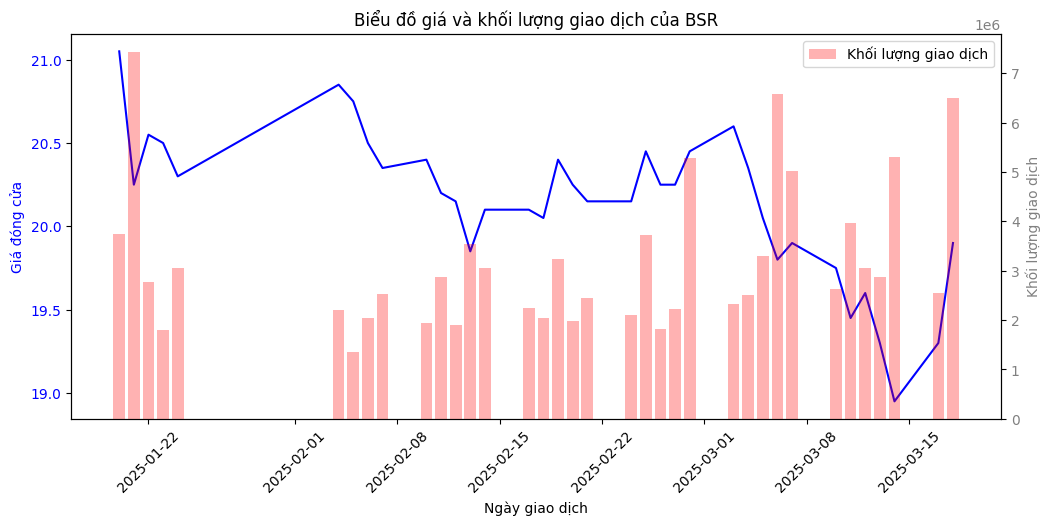

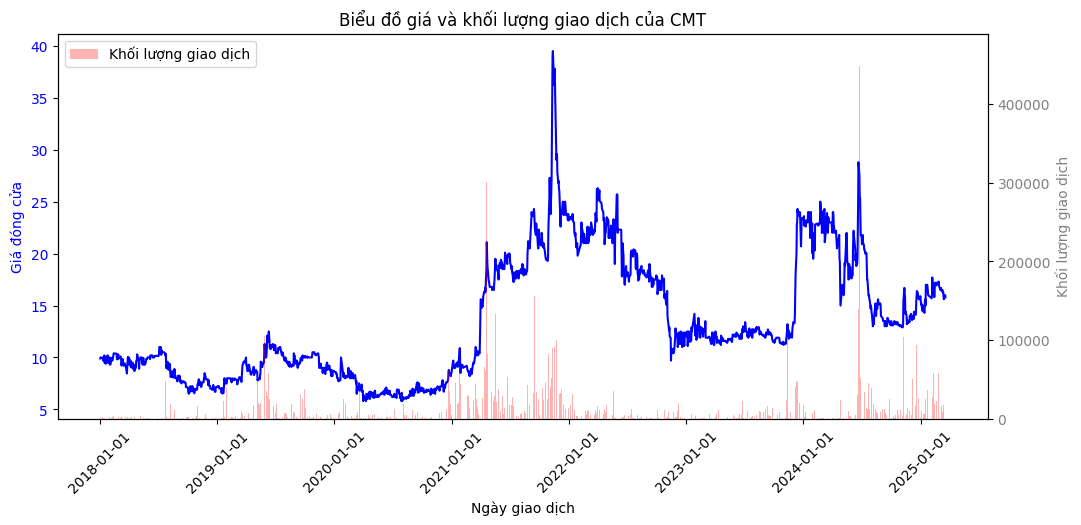

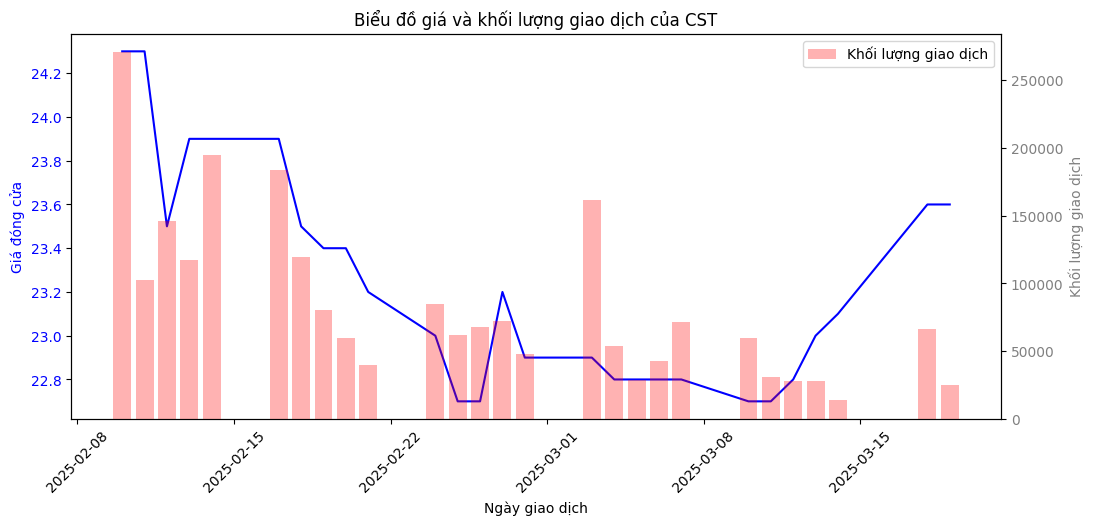

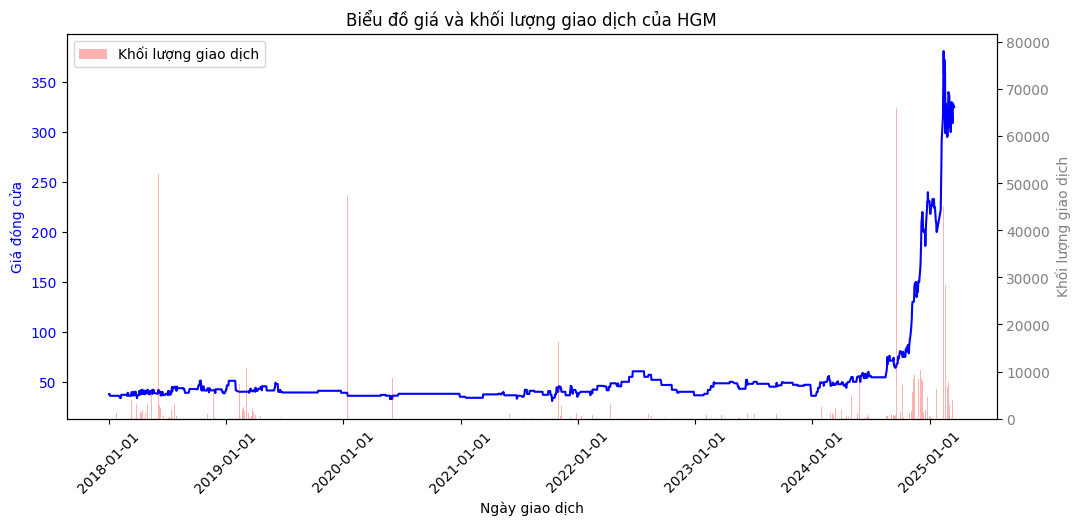

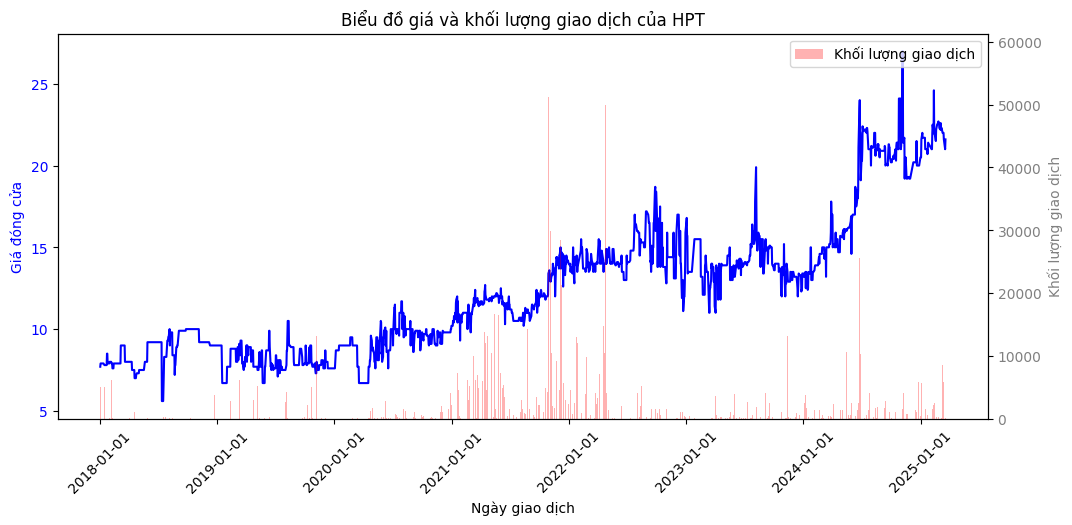

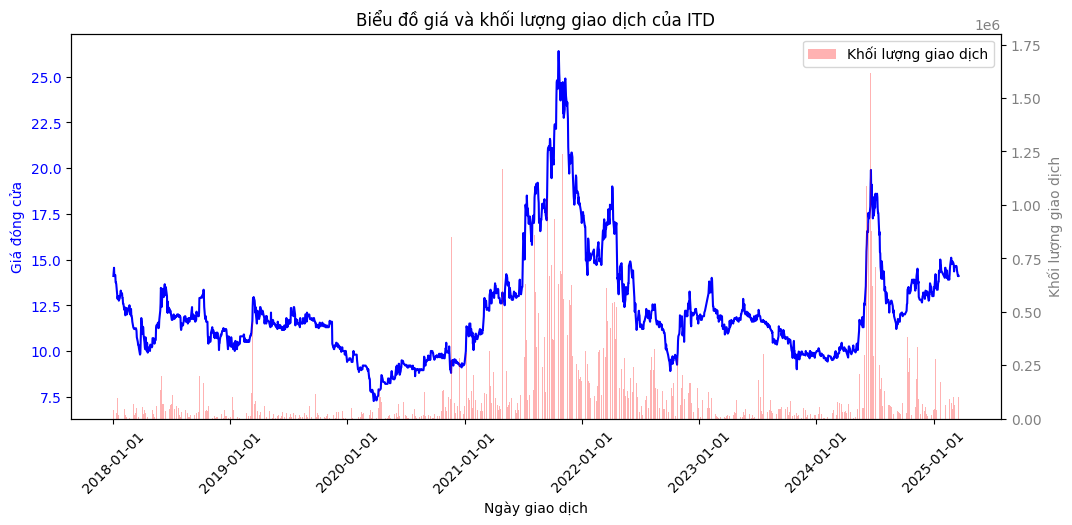

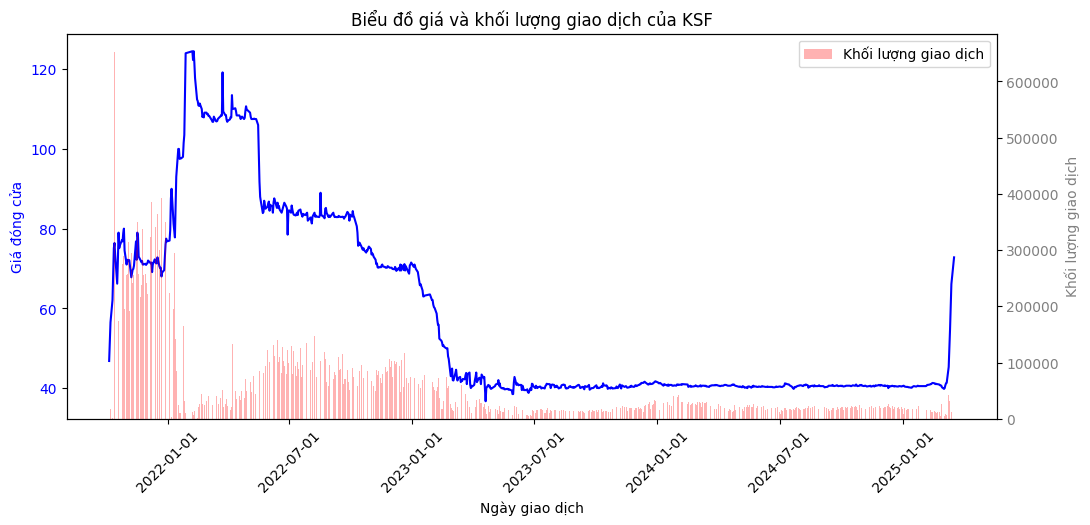

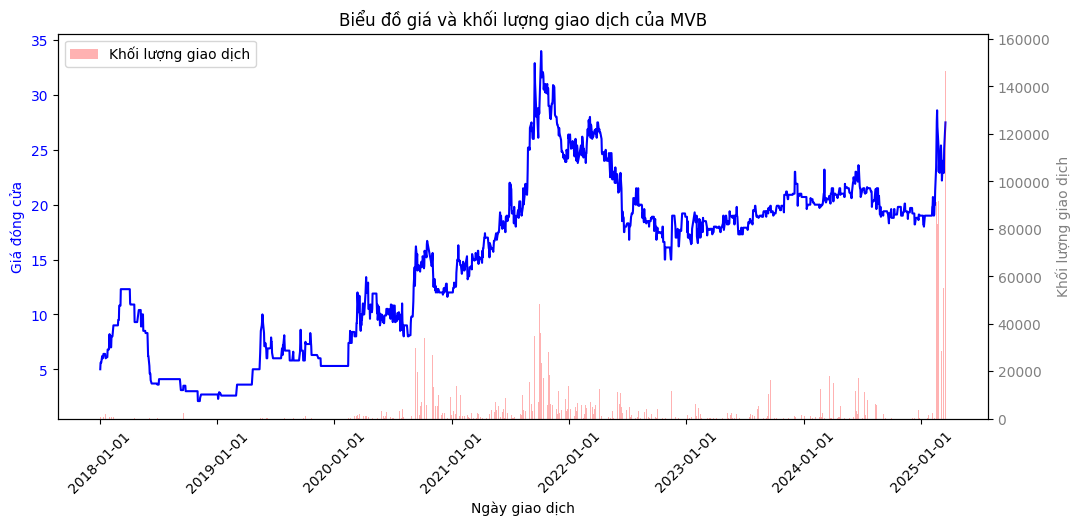

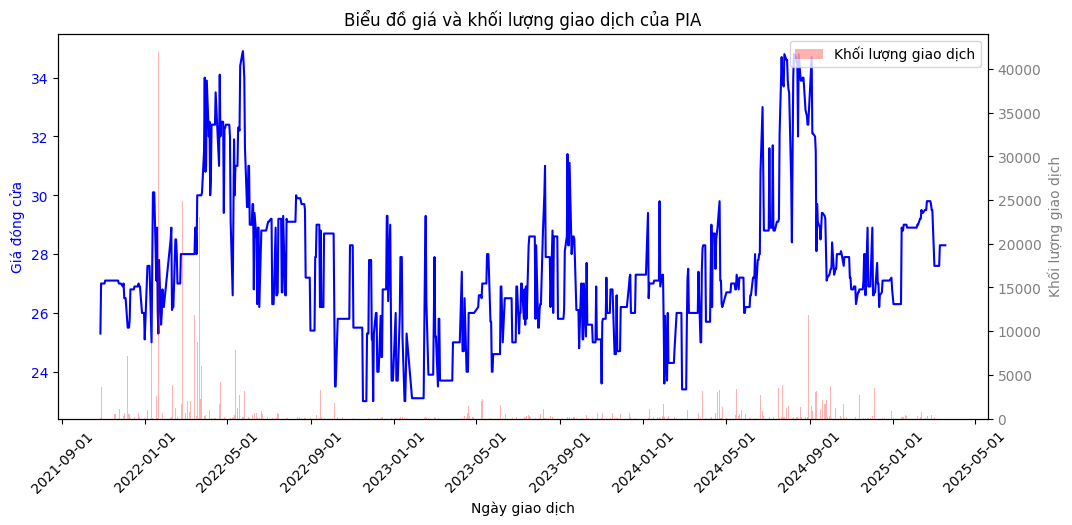

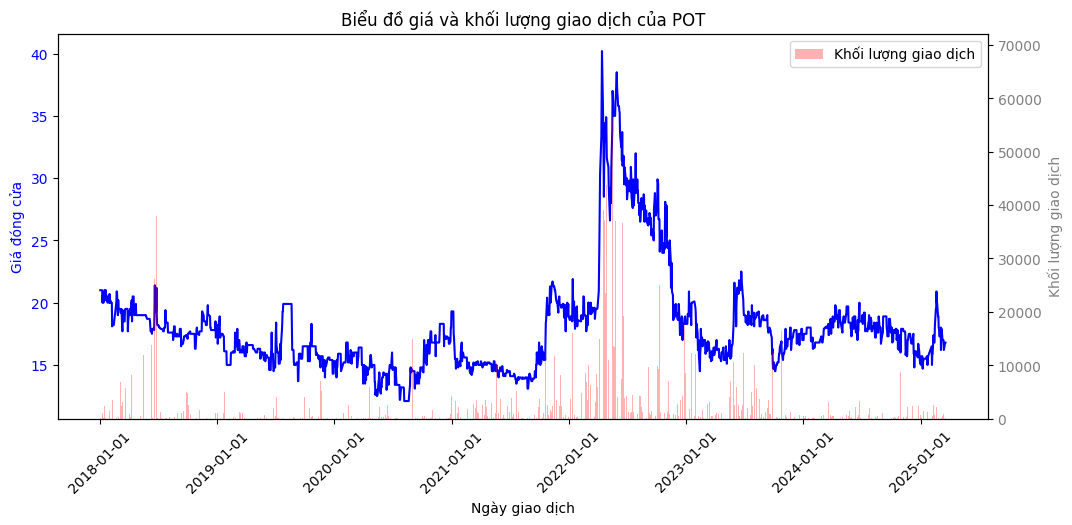

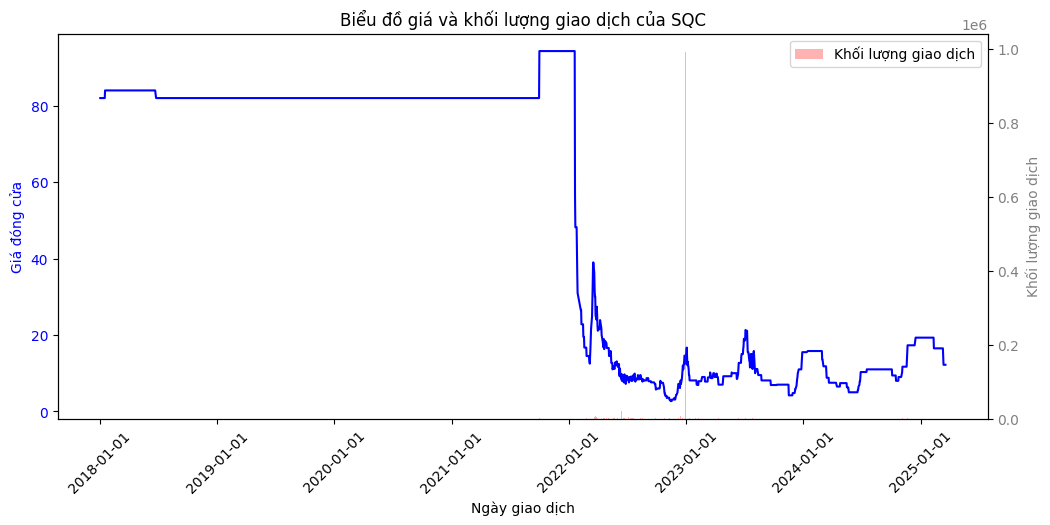

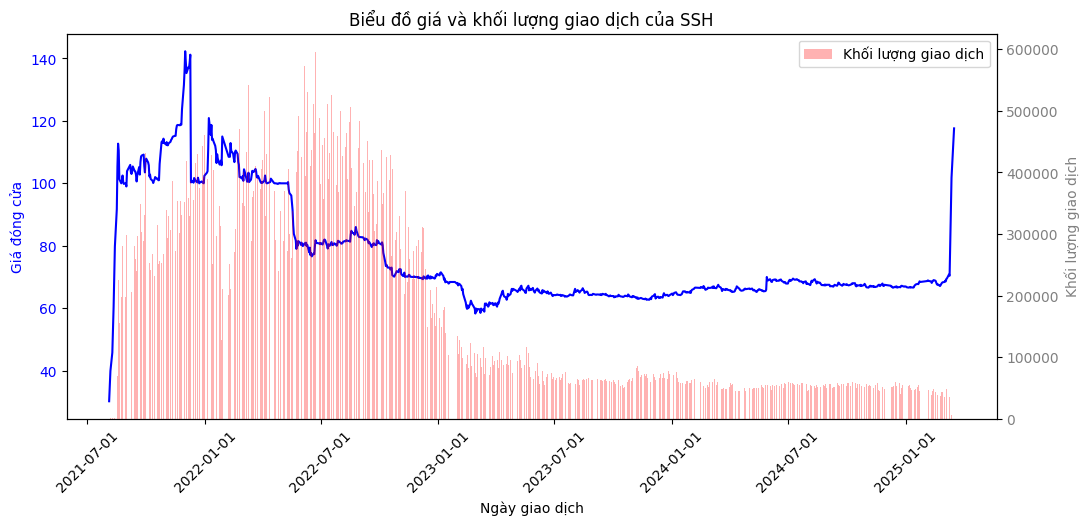

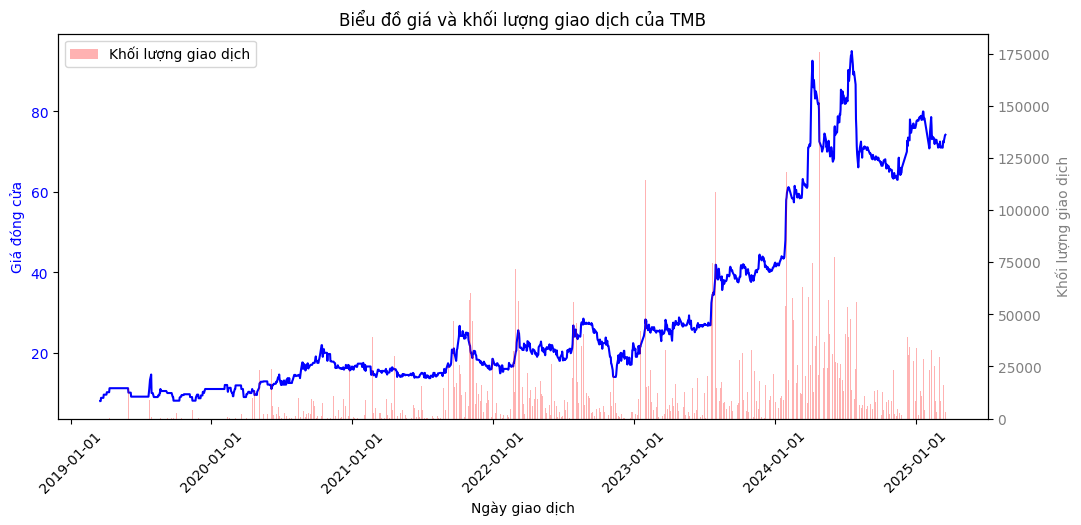

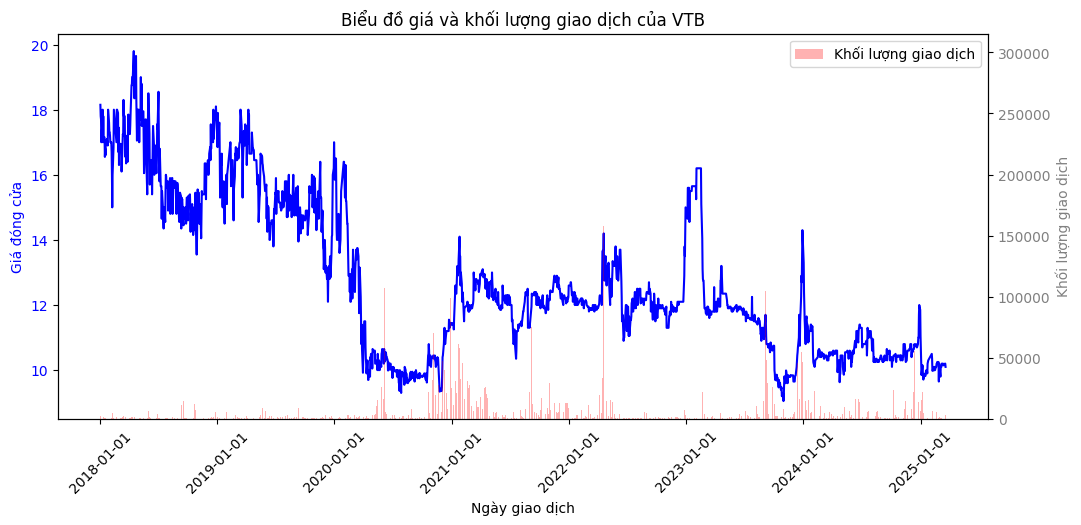

In [79]:
import matplotlib.dates as mdates

for stock in stock_code:  # Chỉ vẽ 5 mã đầu tiên để tránh quá tải
    stock_df = his_cost[his_cost['stock_code'] == stock]

    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Vẽ closing_price trên trục Y bên trái
    ax1.plot(stock_df['transaction_date'], stock_df['closing_price'], color='blue', label="Giá đóng cửa")
    ax1.set_xlabel("Ngày giao dịch")
    ax1.set_ylabel("Giá đóng cửa", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    # Tạo trục Y thứ hai để vẽ matched_volume
    ax2 = ax1.twinx()
    ax2.bar(stock_df['transaction_date'], stock_df['matched_volume'], alpha=0.3, color='red', label="Khối lượng giao dịch")
    ax2.set_ylabel("Khối lượng giao dịch", color='gray')
    ax2.tick_params(axis='y', labelcolor='gray')

    plt.title(f"Biểu đồ giá và khối lượng giao dịch của {stock}")
    plt.legend()
    plt.show()


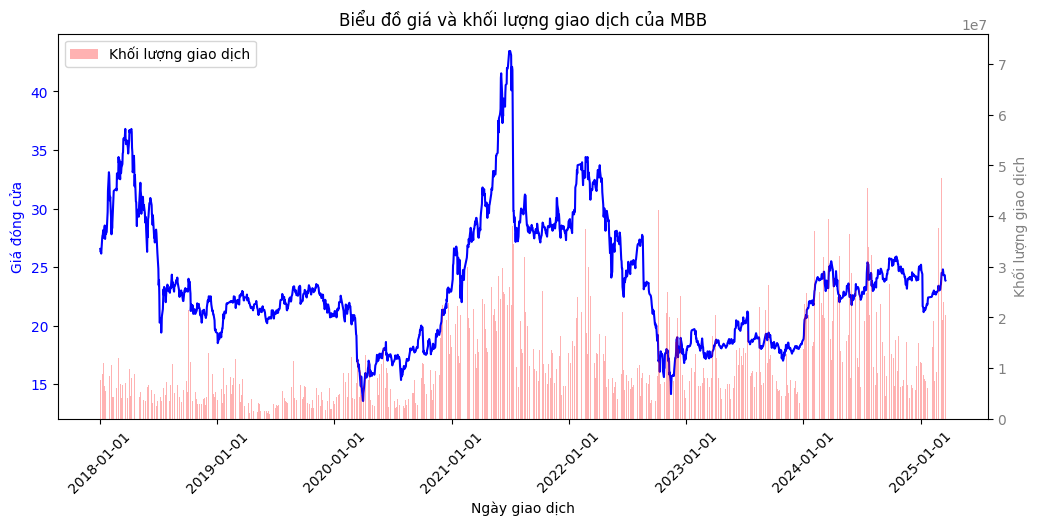

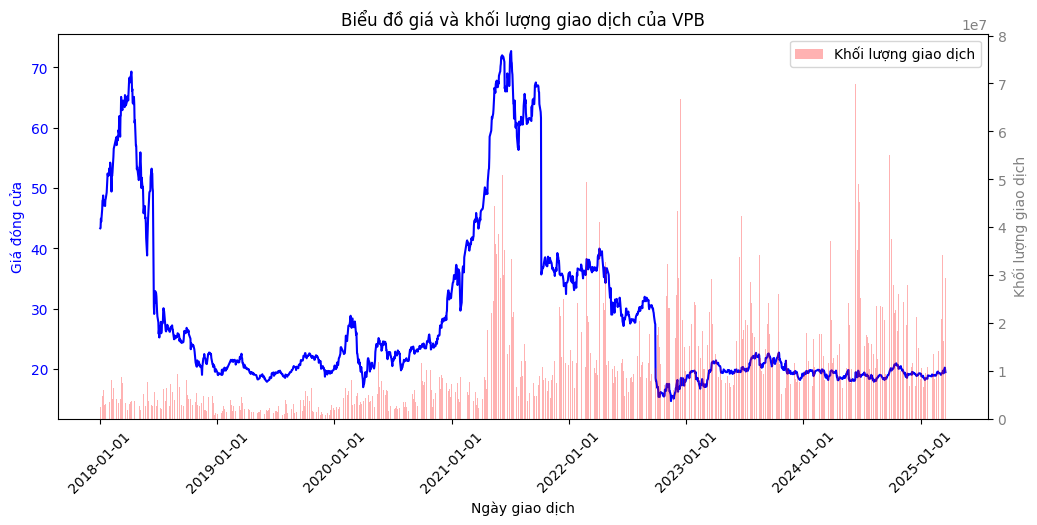

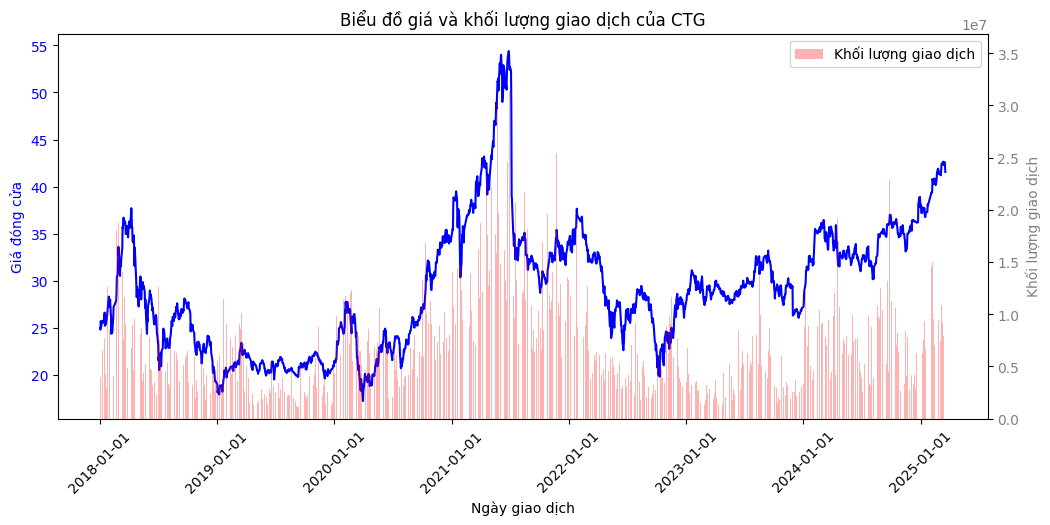

In [377]:
stock_code = ["MBB", "VPB", 'CTG']
plt.style.use('default')  # Đặt style về mặc định

for stock in stock_code:  # Chỉ vẽ 5 mã đầu tiên để tránh quá tải
    stock_df = his_cost[his_cost['stock_code'] == stock]

    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Đặt nền trắng
    fig.patch.set_facecolor('white')
    ax1.set_facecolor('white')

    # Tắt grid
    ax1.grid(False)

    # Vẽ closing_price trên trục Y bên trái
    ax1.plot(stock_df['transaction_date'], stock_df['closing_price'], 
             color='blue', label="Giá đóng cửa")
    ax1.set_xlabel("Ngày giao dịch")
    ax1.set_ylabel("Giá đóng cửa", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    # Tạo trục Y thứ hai để vẽ matched_volume
    ax2 = ax1.twinx()
    ax2.set_facecolor('white')  # Đặt nền trắng cho trục phụ
    ax2.bar(stock_df['transaction_date'], stock_df['matched_volume'], 
            alpha=0.3, color='red', label="Khối lượng giao dịch")
    ax2.set_ylabel("Khối lượng giao dịch", color='gray')
    ax2.tick_params(axis='y', labelcolor='gray')

    # Xóa viền trục phụ
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)

    plt.title(f"Biểu đồ giá và khối lượng giao dịch của {stock}")
    plt.legend()
    plt.show()



In [80]:
# Hàm tính CAGR từ 2018 đến 2023
def calculate_cagr(df):
    if df.empty:
        return None  # Trả về None nếu không có dữ liệu hợp lệ

    V_begin = df['closing_price'].iloc[0]
    V_end = df['closing_price'].iloc[-1]

    start_date = df['transaction_date'].iloc[0]
    end_date = df['transaction_date'].iloc[-1]
    n = (end_date - start_date).days / 365.25

    if n > 0 and V_begin > 0:
        cagr = (V_end / V_begin) ** (1 / n) - 1
    else:
        cagr = None  # Nếu không thể tính, trả về None
    
    return cagr * 100  # Trả về dưới dạng phần trăm

cagr_by_stock = his_cost.groupby('stock_code').apply(calculate_cagr).dropna()
cagr_by_stock

/tmp/ipykernel_6257/4031531726.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cagr_by_stock = his_cost.groupby('stock_code').apply(calculate_cagr).dropna()


stock_code
ACB    -5.301303
BCM    18.256643
BID     5.530261
BSR   -30.232426
CMG     5.330364
CMT     6.699704
CST   -25.064611
CTG     7.331344
FPT    10.720058
HGM    34.842806
HPT    15.382906
ITD     0.000000
KBC    11.261150
KDH     2.440755
KSF    13.675832
LPB    15.154356
MBB    -1.476699
MVB    26.689960
PIA     3.358555
POT    -3.048031
PVD     0.269252
PVS     5.225696
SQC   -23.225764
SSH    45.585901
TCB   -17.714214
TMB    44.937983
VCB     2.668854
VHM   -11.672223
VIC    -5.682523
VPB   -10.507777
VRE   -12.260124
VTB    -7.809096
dtype: float64

In [81]:
type(cagr_by_stock)

pandas.core.series.Series

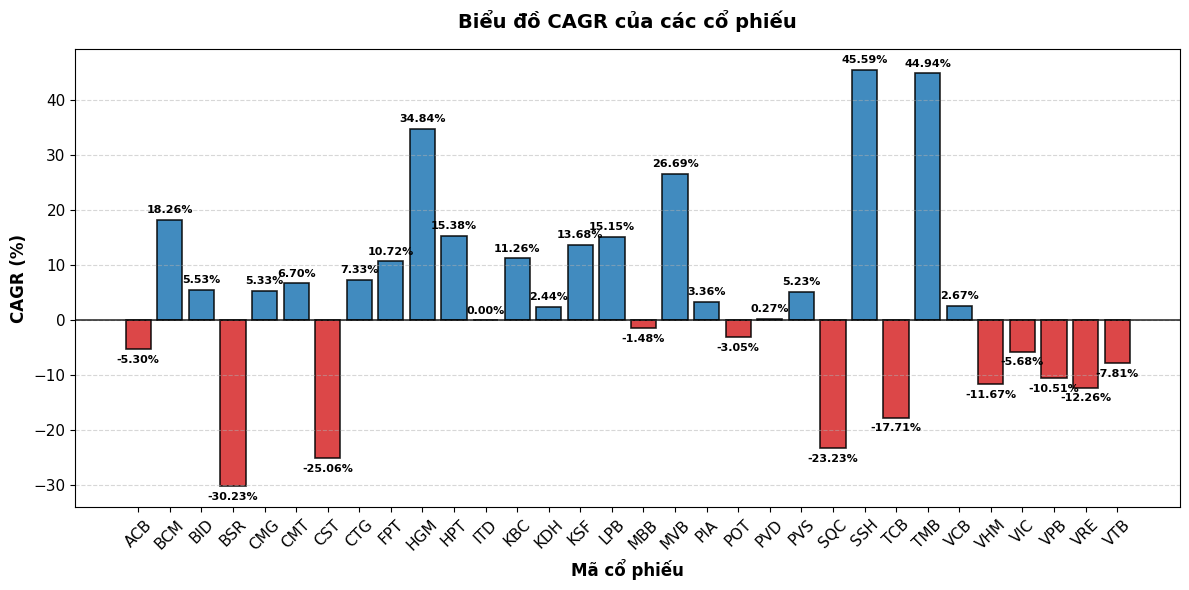

In [87]:
plt.figure(figsize=(12, 6))

# Màu sắc: gradient với xanh dương cho dương, đỏ cam cho âm
colors = ['#1f77b4' if v >= 0 else '#d62728' for v in cagr_by_stock]

# Vẽ biểu đồ cột
bars = plt.bar(cagr_by_stock.index, cagr_by_stock, color=colors, alpha=0.85, edgecolor="black", linewidth=1.2)

# Nhãn trục
plt.xlabel("Mã cổ phiếu", fontsize=12, fontweight='bold')
plt.ylabel("CAGR (%)", fontsize=12, fontweight='bold')
plt.title("Biểu đồ CAGR của các cổ phiếu", fontsize=14, fontweight='bold', pad=15)

# Đường mốc 0%
plt.axhline(0, color='black', linewidth=1.2, alpha=0.8)

# Xoay nhãn trục x cho dễ đọc
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Lưới ngang để dễ quan sát
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Hiển thị giá trị trên cột (điều chỉnh vị trí thông minh)
for bar, value in zip(bars, cagr_by_stock):
    height = bar.get_height()
    offset = 1.2 if height >= 0 else -2.5  # Dịch giá trị lên/xuống tùy vào âm/dương
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{value:.2f}%", 
             ha="center", fontsize=8, fontweight="bold", color="black")

# Bố cục đẹp hơn
plt.tight_layout()
plt.show()

CAGR không phản ánh được rủi ro và chỉ phản ánh tỉ lệ tăng trưởng hàng năm nếu cổ phiếu đó tăng trưởng ổn định. Điều này phù hợp với việc đầu tư dài hạn, tuy nhiên vẫn cần kết hợp với các chỉ số khác để đánh giá thêm.

In [146]:
df2 = pd.read_csv(r"/home/hamornic/FinalXXX/Financial Report Processed/cstc_v2.csv", low_memory=False, index_col=0)
df2.head(10)

period_1 Unnamed: 2  \
Chỉ số tài chính                                                         
Chỉ số tài chính - ACB                                 2003        NaN   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  3116.88        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   13267        VNĐ   
Chỉ số giá thị trường trên thu nhập (P/E)                 0        Lần   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        Lần   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    46.99          %   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     2.43          %   
Chỉ số tài chính - ACB                                 2004        NaN   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  4449.68        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   14757        VNĐ   

                                                   stock_code   Năm  
Chỉ số tài chính                                                     
Chỉ số tài chính - ACB                                    ACB  2003  
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2003  
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2003  
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2003  
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2003  
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2003  
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2003  
Chỉ số tài chính - ACB                                    ACB  2004  
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2004  
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2004

In [147]:
df2['fa'] = df2.index
df2.reset_index(drop=True)
df2 = df2.dropna()
df2['fa'].unique()

array(['Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)',
       'Giá trị sổ sách của cổ phiếu (BVPS)',
       'Chỉ số giá thị trường trên thu nhập (P/E)',
       'Chỉ số giá thị trường trên giá trị sổ sách (P/B)',
       'Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân (ROEA)',
       'Tỷ suất sinh lợi trên tổng tài sản bình quân (ROAA)',
       'Tỷ suất lợi nhuận gộp biên',
       'Tỷ suất sinh lợi trên doanh thu thuần',
       'Tỷ số thanh toán hiện hành (ngắn hạn)',
       'Khả năng thanh toán lãi vay', 'Tỷ số Nợ trên Tổng tài sản',
       'Tỷ số Nợ vay trên Vốn chủ sở hữu', 'Trailing EPS',
       'Book value per share (BVPS)', 'P/E', 'P/B', 'Gross profit margin',
       'Net profit margin', 'ROE', 'ROA', 'Short-term ratio',
       'Interest coverage', 'Liabilities to assets', 'Debt to equity'],
      dtype=object)

In [148]:
df2.isna().sum()

period_1      0
Unnamed: 2    0
stock_code    0
Năm           0
fa            0
dtype: int64

In [149]:
df2.head(20)

period_1 Unnamed: 2  \
Chỉ số tài chính                                                         
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  3116.88        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   13267        VNĐ   
Chỉ số giá thị trường trên thu nhập (P/E)                 0        Lần   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        Lần   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    46.99          %   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     2.43          %   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  4449.68        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   14757        VNĐ   
Chỉ số giá thị trường trên thu nhập (P/E)                 0        Lần   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        Lần   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    33.65          %   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     1.63          %   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  3155.08        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   13531        VNĐ   
Chỉ số giá thị trường trên thu nhập (P/E)                 0        Lần   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        Lần   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    30.02          %   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     1.51          %   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  4594.61        VNĐ   
Giá trị sổ sách của cổ phiếu (BVPS)                   15036        VNĐ   

                                                   stock_code   Năm  \
Chỉ số tài chính                                                      
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2003   
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2003   
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2003   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2003   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2003   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2003   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2004   
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2004   
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2004   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2004   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2004   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2004   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2005   
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2005   
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2005   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2005   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2005   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2005   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2006   
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2006   

                                                                                                   fa  
Chỉ số tài chính                                                                                       
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  Thu nhập trên mỗi cổ phần của 4 quý gần nhất (...  
Giá trị sổ sách của cổ phiếu (BVPS)                               Giá trị sổ sách của cổ phiếu (BVPS)  
Chỉ số giá thị trường trên thu nhập (P/E)                   Chỉ số giá thị trường trên thu nhập (P/E)  
Chỉ số giá thị trường trên giá trị sổ sách (P/B)     Chỉ số giá thị trường trên giá trị sổ sách (P/B)  
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...  Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quâ...  
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...  Tỷ suất sinh lợi trên tổng tài sản bình quân (...  
Thu nhập trên mỗi cổ phần c

In [150]:
df2 = df2.reset_index()
df2 = df2.drop(columns =['Chỉ số tài chính','Unnamed: 2'])

In [151]:
df2.head(20)

period_1 stock_code   Năm  \
0   3116.88        ACB  2003   
1     13267        ACB  2003   
2         0        ACB  2003   
3         0        ACB  2003   
4     46.99        ACB  2003   
5      2.43        ACB  2003   
6   4449.68        ACB  2004   
7     14757        ACB  2004   
8         0        ACB  2004   
9         0        ACB  2004   
10    33.65        ACB  2004   
11     1.63        ACB  2004   
12  3155.08        ACB  2005   
13    13531        ACB  2005   
14        0        ACB  2005   
15        0        ACB  2005   
16    30.02        ACB  2005   
17     1.51        ACB  2005   
18  4594.61        ACB  2006   
19    15036        ACB  2006   

                                                   fa  
0   Thu nhập trên mỗi cổ phần của 4 quý gần nhất (...  
1                 Giá trị sổ sách của cổ phiếu (BVPS)  
2           Chỉ số giá thị trường trên thu nhập (P/E)  
3    Chỉ số giá thị trường trên giá trị sổ sách (P/B)  
4   Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quâ...  
5   Tỷ suất sinh lợi trên tổng tài sản bình quân (...  
6   Thu nhập trên mỗi cổ phần của 4 quý gần nhất (...  
7                 Giá trị sổ sách của cổ phiếu (BVPS)  
8           Chỉ số giá thị trường trên thu nhập (P/E)  
9    Chỉ số giá thị trường trên giá trị sổ sách (P/B)  
10  Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quâ...  
11  Tỷ suất sinh lợi trên tổng tài sản bình quân (...  
12  Thu nhập trên mỗi cổ phần của 4 quý gần nhất (...  
13                Giá trị sổ sách của cổ phiếu (BVPS)  
14          Chỉ số giá thị trường trên thu nhập (P/E)  
15   Chỉ số giá thị trường trên giá trị sổ sách (P/B)  
16  Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quâ...  
17  Tỷ suất sinh lợi trên tổng tài sản bình quân (...  
18  Thu nhập trên mỗi cổ phần của 4 quý gần nhất (...  
19                Giá trị sổ sách của cổ phiếu (BVPS)

In [152]:
# Giả sử df2 đã được load
# Trích xuất nội dung trong dấu ngoặc
df2['fa_extracted'] = df2['fa'].str.extract(r'\((.*?)\)')

# Chỉ giữ lại những dòng có giá trị được trích xuất (không phải NaN)
df2 = df2[df2['fa_extracted'].notna()].copy()

# Gán lại cột 'fa' bằng giá trị trong 'fa_extracted'
df2['fa'] = df2['fa_extracted']

# Loại bỏ cột tạm 'fa_extracted'
df2 = df2.drop(columns=['fa_extracted'])

# Kiểm tra kết quả
df2['fa'].unique()

array(['EPS', 'BVPS', 'P/E', 'P/B', 'ROEA', 'ROAA', 'ngắn hạn'],
      dtype=object)

In [158]:
df2['period_1'] = pd.to_numeric(df2['period_1'], errors='coerce')
df2 = df2.rename(columns={'Năm': 'year'})
df2['year'] = pd.to_datetime(df2['year'], format='%Y')
df2_filtered = df2[df2['year'].dt.year >= 2018].reset_index()
nan_count = df2['period_1'].isna().sum()
nan_count

np.int64(0)

In [162]:
import pandas as pd

# 1. Lọc bỏ các dòng có 'fa' = 'ngắn hạn'
df2_filtered = df2[df2['fa'] != 'ngắn hạn'].copy()

# 2. Kiểm tra mỗi stock_code xem có đủ các chỉ số không
required_set = {'EPS', 'BVPS', 'P/E', 'P/B', 'ROEA', 'ROAA'}
missing_fa = {}

for stock in df2_filtered['stock_code'].unique():
    fa_values = set(df2_filtered.loc[df2_filtered['stock_code'] == stock, 'fa'].unique())
    missing = required_set - fa_values
    if missing:
        missing_fa[stock] = missing

print("Các mã cổ phiếu thiếu các chỉ số tài chính:")
print(missing_fa)

# 3. Chuyển đổi 'year' về datetime để sắp xếp dữ liệu theo thời gian
df2_filtered['year'] = pd.to_datetime(df2_filtered['year'])

# 4. Tính EMA cho mỗi nhóm (stock_code, fa)
df2_filtered.sort_values(by=['stock_code', 'fa', 'year'], inplace=True)

df2_filtered['period_ema'] = df2_filtered.groupby(['stock_code', 'fa'])['period_1'].transform(
    lambda x: x.ewm(span=3, adjust=False).mean()  # EMA với cửa sổ 3 năm
)

# 5. Pivot bảng với giá trị EMA
pivoted = df2_filtered[df2_filtered['fa'].isin(required_set)].pivot_table(
    index='stock_code',
    columns='fa',
    values='period_ema',  # Dùng giá trị EMA thay vì giá trị gốc
    aggfunc='mean'
)

# 6. Kiểm tra NaN trong các cột
print("Kết quả pivot (các chỉ số tài chính):")
print(pivoted.head())

print("Số lượng giá trị NaN ở mỗi cột:")
print(pivoted.isna().sum())


Các mã cổ phiếu thiếu các chỉ số tài chính:
{'HPT': {'ROEA', 'P/E', 'ROAA', 'P/B', 'EPS'}}
Kết quả pivot (các chỉ số tài chính):
fa                  BVPS          EPS       P/B        P/E      ROAA  \
stock_code                                                             
ACB         15028.358688  3575.201359  0.589275   8.296154  1.544404   
BCM         15155.937277  7626.983285  1.510827  14.078431  2.665144   
BID         16152.657074  2023.442360  0.801989   5.823628  0.697492   
BSR         11381.985372  1225.288487  0.532212   6.558101  4.793333   
CMG         15405.367109  1240.136807  0.760325  13.441314  3.548361   

fa               ROEA  
stock_code             
ACB         24.770775  
BCM          8.862902  
BID         13.198344  
BSR          8.289167  
CMG          7.853878  
Số lượng giá trị NaN ở mỗi cột:
fa
BVPS    0
EPS     1
P/B     1
P/E     1
ROAA    1
ROEA    1
dtype: int64


In [163]:
df2_filtered

period_1 stock_code       year    fa    period_ema
1     13267.00        ACB 2003-01-01  BVPS  13267.000000
7     14757.00        ACB 2004-01-01  BVPS  14012.000000
13    13531.00        ACB 2005-01-01  BVPS  13771.500000
19    15036.00        ACB 2006-01-01  BVPS  14403.750000
25    23794.00        ACB 2007-01-01  BVPS  19098.875000
...        ...        ...        ...   ...           ...
5439      9.43        VTB 2020-01-01  ROEA      8.238035
5451      2.30        VTB 2021-01-01  ROEA      5.269017
5462      9.67        VTB 2022-01-01  ROEA      7.469509
5474      5.78        VTB 2023-01-01  ROEA      6.624754
5486      6.14        VTB 2024-01-01  ROEA      6.382377

[3178 rows x 5 columns]

In [164]:
df2_filtered = df2_filtered[df2_filtered['year'].dt.year >= 2018]

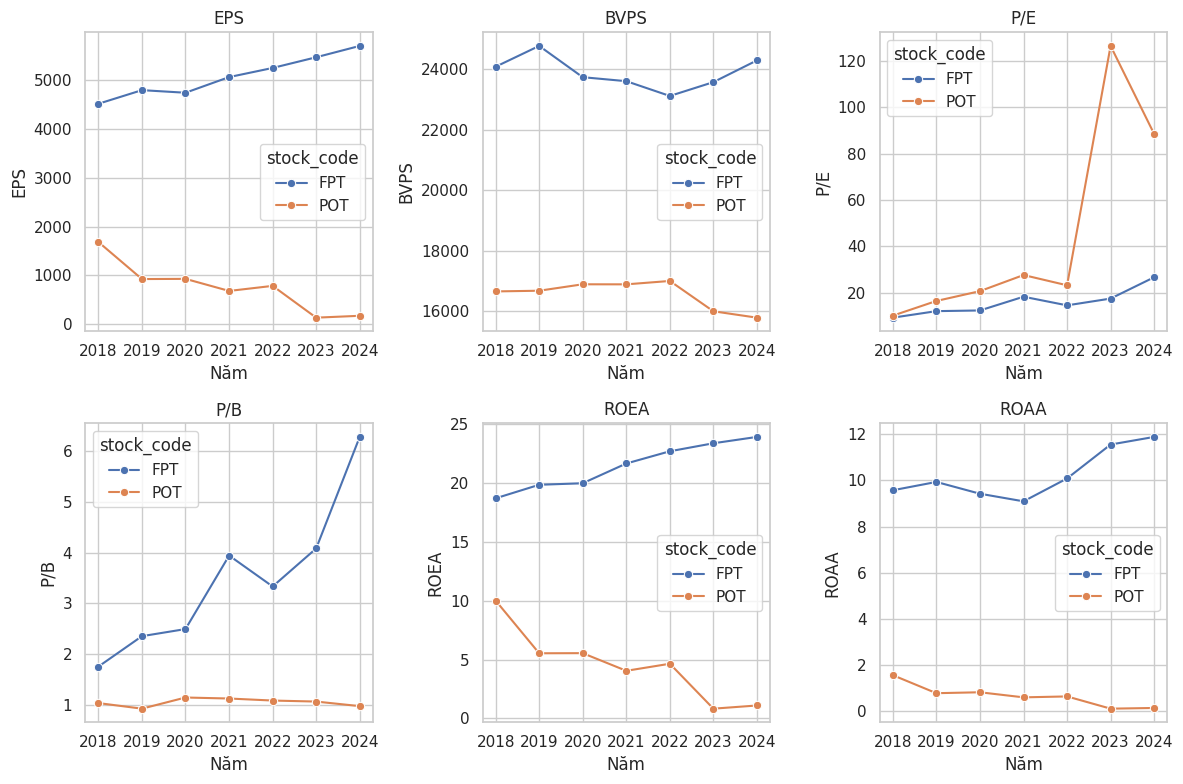

In [187]:
df_filtered = df2_filtered[df2_filtered["stock_code"].isin(["FPT", "POT"])]

# Tạo danh sách các chỉ số cần vẽ
fa_list = ["EPS", "BVPS", "P/E", "P/B", "ROEA", "ROAA"]

# Thiết lập kiểu vẽ biểu đồ
sns.set(style="whitegrid")

# Vẽ từng chỉ số theo thời gian
plt.figure(figsize=(12, 8))

for i, fa in enumerate(fa_list, 1):
    plt.subplot(2, 3, i)  # Chia thành lưới 2x3
    sns.lineplot(
        data=df_filtered[df_filtered["fa"] == fa], 
        x="year", y="period_1", hue="stock_code", marker="o"
    )
    plt.title(fa)
    plt.xlabel("Năm")
    plt.ylabel(fa)

plt.tight_layout()
plt.show()

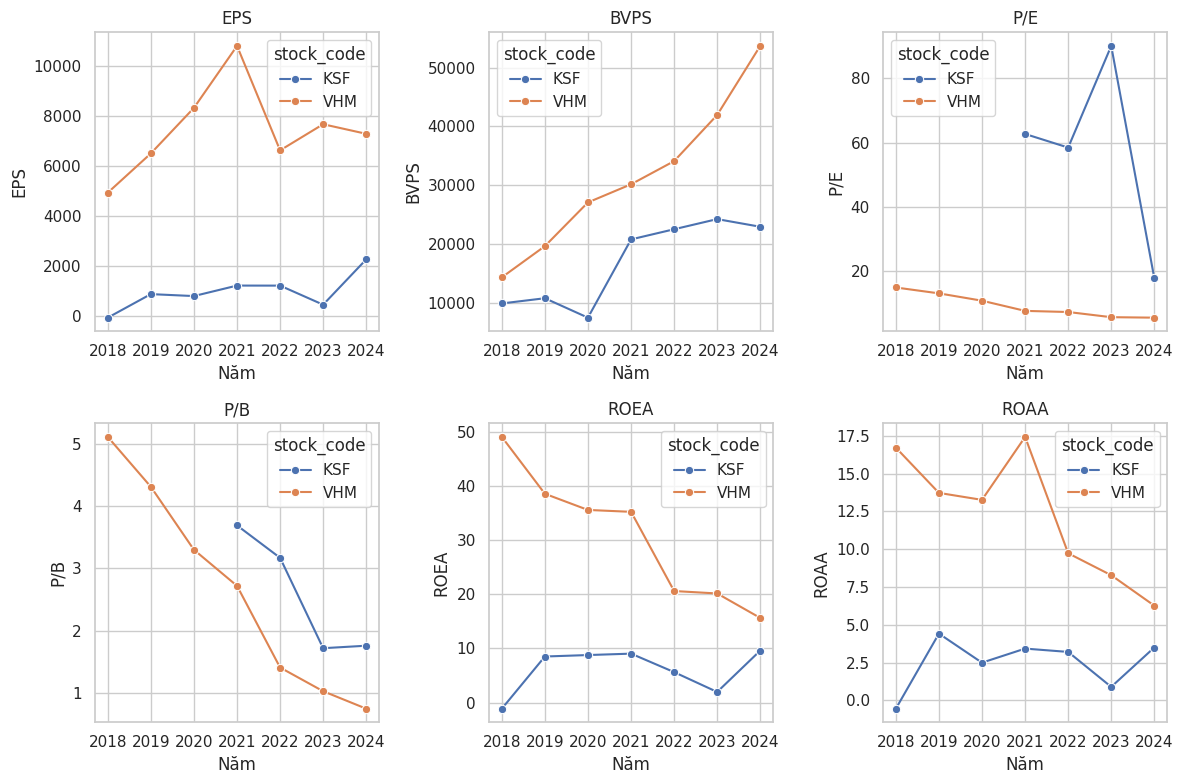

In [196]:
df_filtered = df2_filtered[df2_filtered["stock_code"].isin(["VHM", "KSF"])]

# Tạo danh sách các chỉ số cần vẽ
fa_list = ["EPS", "BVPS", "P/E", "P/B", "ROEA", "ROAA"]

# Thiết lập kiểu vẽ biểu đồ
sns.set(style="whitegrid")

# Vẽ từng chỉ số theo thời gian
plt.figure(figsize=(12, 8))

for i, fa in enumerate(fa_list, 1):
    plt.subplot(2, 3, i)  # Chia thành lưới 2x3
    sns.lineplot(
        data=df_filtered[df_filtered["fa"] == fa], 
        x="year", y="period_1", hue="stock_code", marker="o"
    )
    plt.title(fa)
    plt.xlabel("Năm")
    plt.ylabel(fa)

plt.tight_layout()
plt.show()

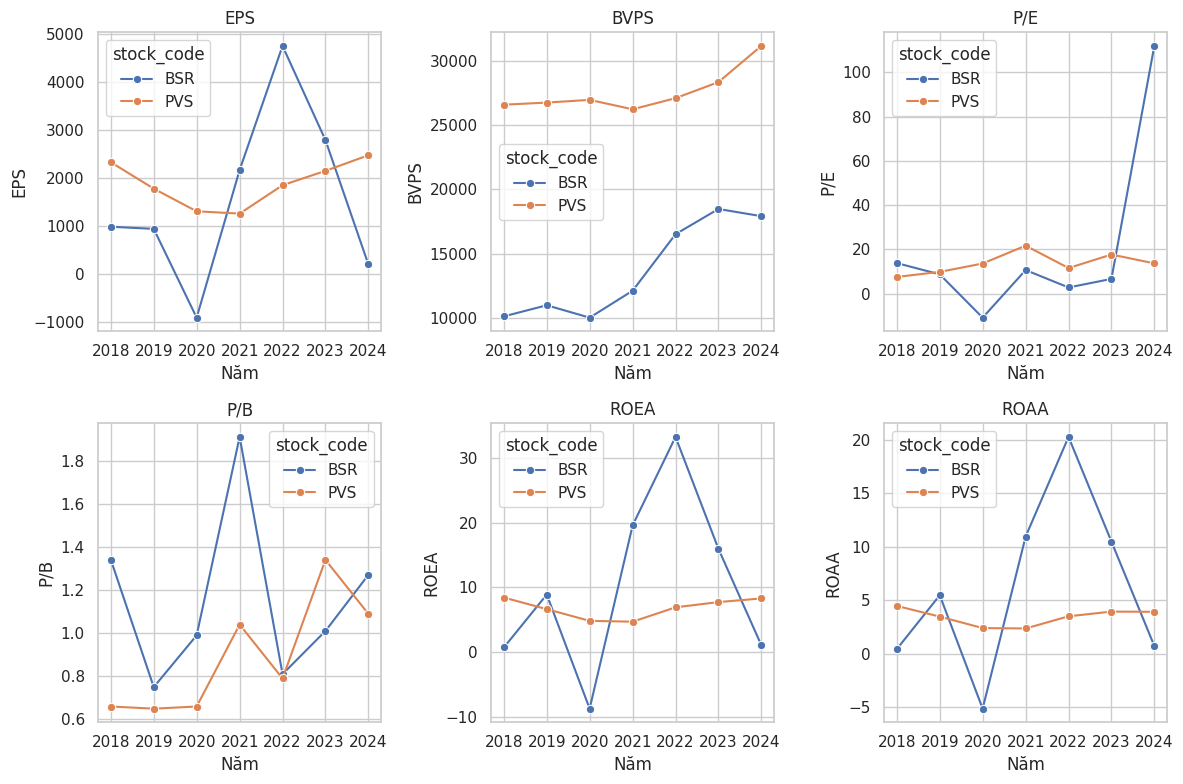

In [197]:
df_filtered = df2_filtered[df2_filtered["stock_code"].isin(["PVS", "BSR"])]

# Tạo danh sách các chỉ số cần vẽ
fa_list = ["EPS", "BVPS", "P/E", "P/B", "ROEA", "ROAA"]

# Thiết lập kiểu vẽ biểu đồ
sns.set(style="whitegrid")

# Vẽ từng chỉ số theo thời gian
plt.figure(figsize=(12, 8))

for i, fa in enumerate(fa_list, 1):
    plt.subplot(2, 3, i)  # Chia thành lưới 2x3
    sns.lineplot(
        data=df_filtered[df_filtered["fa"] == fa], 
        x="year", y="period_1", hue="stock_code", marker="o"
    )
    plt.title(fa)
    plt.xlabel("Năm")
    plt.ylabel(fa)

plt.tight_layout()
plt.show()

# Bộ lọc 1:
## Lọc mã cổ theo volume ( chưa tối ưu )

In [82]:
df_filtered_time = df_quarterly[
    (df_quarterly["transaction_date"] >= "2022-01-01") &
    (df_quarterly["transaction_date"] <= "2024-12-31")
]

# Tìm danh sách các mã cổ phiếu thỏa mãn điều kiện trong giai đoạn 2022-2024
valid_stock_codes = df_filtered_time.groupby("stock_code").filter(
    lambda x: x["matched_volume"]["sum"].min() > 500 and x["closing_price"]["mean"].min() > 2
)["stock_code"].unique()

# Giữ nguyên dữ liệu gốc nhưng chỉ với các mã cổ phiếu hợp lệ
df_result = df_quarterly[df_quarterly["stock_code"].isin(valid_stock_codes)]
df_result

stock_code transaction_date closing_price             matched_volume  \
                                           sum        mean            sum   
0           ACB       2006-12-31       3240.60  140.895652        1279000   
1           ACB       2007-03-31      12525.40  215.955172        4949400   
2           ACB       2007-06-30      11051.20  181.167213        5993900   
3           ACB       2007-09-30       7859.00  122.796875       10180700   
4           ACB       2007-12-31      11044.20  169.910769       19209600   
...         ...              ...           ...         ...            ...   
1512        VTB       2024-03-31        636.85   10.794068         493400   
1513        VTB       2024-06-30        643.90   10.555738         333900   
1514        VTB       2024-09-30        678.25   10.597656         117400   
1515        VTB       2024-12-31        700.20   10.609091         504000   
1516        VTB       2025-03-31        493.47   10.070816         138800   

                     
               mean  
0      55608.695652  
1      85334.482759  
2      98260.655738  
3     159073.437500  
4     295532.307692  
...             ...  
1512    8362.711864  
1513    5473.770492  
1514    1834.375000  
1515    7636.363636  
1516    2832.653061  

[1453 rows x 6 columns]

In [83]:
df_result['stock_code'].unique().size

29

In [159]:
his_cost = his_cost[his_cost['stock_code'].isin(valid_stock_codes)]
his_cost

stock_code transaction_date  closing_price  matched_volume  \
0             ABC       2016-08-18          39.70         25400.0   
1             ABC       2016-08-19          37.50         23700.0   
2             ABC       2016-08-22          36.00         13400.0   
3             ABC       2016-08-23          34.80          5000.0   
4             ABC       2016-08-24          35.00         16000.0   
...           ...              ...            ...             ...   
168099        YEG       2025-03-04          16.60       6680800.0   
168100        YEG       2025-03-05          15.80       3995700.0   
168101        YEG       2025-03-06          16.00       2894100.0   
168102        YEG       2025-03-07          15.90       2182400.0   
168103        YEG       2025-03-10          15.95       2249100.0   

        matched_value  negotiated_volume  negotiated_value  opening_price  \
0                1.00                0.0               0.0          39.90   
1                0.91                0.0               0.0          39.30   
2                0.49                0.0               0.0          38.00   
3                0.18                0.0               0.0          36.00   
4                0.56                0.0               0.0          34.80   
...               ...                ...               ...            ...   
168099         110.95                0.0               0.0          16.10   
168100          65.22                0.0               0.0          16.70   
168101          45.91                0.0               0.0          16.05   
168102          34.88                0.0               0.0          16.05   
168103          35.72                0.0               0.0          15.90   

        highest_price  lowest_price  change  percent  
0               39.90         36.30   11.20    39.30  
1               39.30         37.50   -1.70    -4.34  
2               38.00         36.00   -2.30    -6.01  
3               36.00         34.70   -1.80    -4.92  
4               35.00         34.80   -0.30    -0.85  
...               ...           ...     ...      ...  
168099          17.10         15.90    0.60     3.75  
168100          16.90         15.80   -0.80    -4.82  
168101          16.15         15.70    0.20     1.27  
168102          16.35         15.80   -0.10    -0.62  
168103          16.15         15.75    0.05     0.31  

[98952 rows x 12 columns]

## Phân phối của (percent)
Không biết cột percent và biến động giá có phải là 1 không?


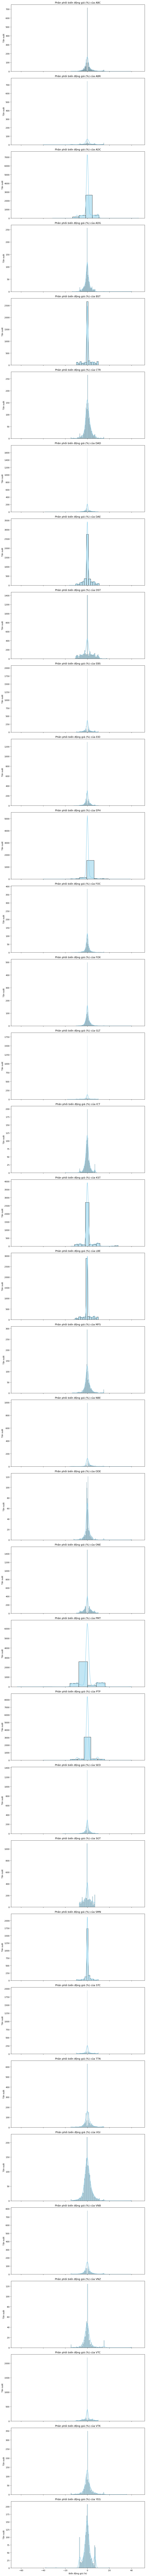

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Lấy danh sách các mã cổ phiếu duy nhất
stock_codes = his_cost['stock_code'].unique()
n_stocks = len(stock_codes)

# Thiết lập figure với mỗi mã trên một hàng
fig, axes = plt.subplots(n_stocks, 1, figsize=(10, 5 * n_stocks), sharex=True)

# Nếu chỉ có 1 mã, axes không phải là mảng, cần xử lý riêng
if n_stocks == 1:
    axes = [axes]

# Vẽ biểu đồ cho từng mã cổ phiếu
for i, stock in enumerate(stock_codes):
    # Lọc dữ liệu cho mã cổ phiếu hiện tại
    stock_data = his_cost[his_cost['stock_code'] == stock]
    
    # Vẽ histogram và đường mật độ
    sns.histplot(stock_data['percent'], kde=True, ax=axes[i], color='skyblue')
    
    # Đặt tiêu đề và nhãn
    axes[i].set_title(f'Phân phối biến động giá (%) của {stock}')
    axes[i].set_xlabel('Biến động giá (%)')
    axes[i].set_ylabel('Tần suất')

# Điều chỉnh layout và hiển thị
plt.tight_layout()
plt.show()

## Phân phối biến động lợi nhuận

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26020\2256999198.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



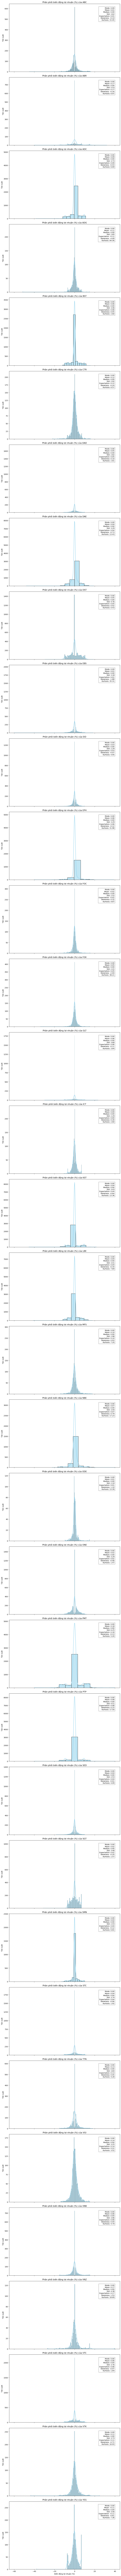

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Dữ liệu mẫu (thay bằng dữ liệu thực tế của bạn)

# Chuyển đổi transaction_date thành định dạng datetime
his_cost['transaction_date'] = pd.to_datetime(his_cost['transaction_date'])

# Sắp xếp dữ liệu theo stock_code và transaction_date
his_cost = his_cost.sort_values(by=['stock_code', 'transaction_date'])

# Tính daily_return (biến động lợi nhuận hàng ngày)
his_cost['daily_return'] = his_cost.groupby('stock_code')['closing_price'].pct_change() * 100

# Loại bỏ các giá trị NaN trong daily_return (ngày đầu tiên của mỗi mã)
his_cost = his_cost.dropna(subset=['daily_return'])

# Lấy danh sách các mã cổ phiếu duy nhất
stock_codes = his_cost['stock_code'].unique()
n_stocks = len(stock_codes)

# Thiết lập figure với mỗi mã trên một hàng
fig, axes = plt.subplots(n_stocks, 1, figsize=(10, 6 * n_stocks), sharex=True)

# Nếu chỉ có 1 mã, axes không phải là mảng
if n_stocks == 1:
    axes = [axes]

# Vẽ biểu đồ và tính thống kê cho từng mã cổ phiếu
for i, stock in enumerate(stock_codes):
    # Lọc dữ liệu cho mã cổ phiếu hiện tại
    stock_data = his_cost[his_cost['stock_code'] == stock]
    returns = stock_data['daily_return']
    
    # Vẽ histogram và đường mật độ
    sns.histplot(returns, kde=True, ax=axes[i], color='skyblue')
    
    # Tính các thống kê
    mode = stats.mode(returns, keepdims=True)[0][0]  # Mode đầu tiên nếu có nhiều mode
    mean = returns.mean()
    median = returns.median()
    std = returns.std()
    expectation = mean  # Kỳ vọng là mean
    skewness = returns.skew()
    kurtosis = returns.kurtosis()
    
    # Chuẩn bị văn bản thống kê để hiển thị
    stats_text = (f'Mode: {mode:.2f}\n'
                  f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'Std: {std:.2f}\n'
                  f'Expectation: {expectation:.2f}\n'
                  f'Skewness: {skewness:.2f}\n'
                  f'Kurtosis: {kurtosis:.2f}')
    
    # Hiển thị thống kê trên biểu đồ
    axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes, 
                 verticalalignment='top', horizontalalignment='right', 
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Đặt tiêu đề và nhãn
    axes[i].set_title(f'Phân phối biến động lợi nhuận (%) của {stock}')
    axes[i].set_xlabel('Biến động lợi nhuận (%)')
    axes[i].set_ylabel('Tần suất')

# Điều chỉnh layout và hiển thị biểu đồ
plt.tight_layout()
plt.show()

## Lọc theo CAGR ( đang phân vân nên để ở lọc 1 hay lọc 2)

In [172]:
import pandas as pd

# Chuyển đổi transaction_date về dạng datetime
his_cost['transaction_date'] = pd.to_datetime(his_cost['transaction_date'])

# Bước 1: Lọc những mã có min(transaction_date) <= 2018-01-01
listed_before_2018 = his_cost.groupby('stock_code')['transaction_date'].min() <= '2018-01-01'
valid_stocks = listed_before_2018[listed_before_2018].index

# Bước 2: Giữ lại dữ liệu từ 2018 đến 02/2025
his_cost_filtered = his_cost[
    (his_cost['stock_code'].isin(valid_stocks)) &
    (his_cost['transaction_date'] >= '2018-01-01') &
    (his_cost['transaction_date'] <= '2025-02-28')
]

# Bước 3: Lọc dữ liệu từ 2018-2023 để tính CAGR
his_cost_cagr = his_cost_filtered[
    (his_cost_filtered['transaction_date'] >= '2018-01-01') &
    (his_cost_filtered['transaction_date'] <= '2023-12-31')
]

# Hàm tính CAGR từ 2018 đến 2023
def calculate_cagr(df):
    if df.empty:
        return None  # Trả về None nếu không có dữ liệu hợp lệ

    V_begin = df['closing_price'].iloc[0]
    V_end = df['closing_price'].iloc[-1]

    start_date = df['transaction_date'].iloc[0]
    end_date = df['transaction_date'].iloc[-1]
    n = (end_date - start_date).days / 365.25

    if n > 0 and V_begin > 0:
        cagr = (V_end / V_begin) ** (1 / n) - 1
    else:
        cagr = None  # Nếu không thể tính, trả về None
    
    return cagr * 100  # Trả về dưới dạng phần trăm

# Tính CAGR cho từng mã từ 2018-2023
cagr_by_stock = his_cost_cagr.groupby('stock_code').apply(calculate_cagr).dropna()
cagr_by_stock




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26020\4249999702.py:43: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



stock_code
ABC    -1.768885
ADC     2.454313
BST     8.273070
CTR    23.611686
DAD     1.775194
DAE    -2.048591
DST    -9.306956
EBS     3.624677
EID     5.898534
EPH     0.000000
FOX    -5.661749
GLT   -20.556721
KST    -3.190584
LBE     3.974569
NBE    12.272889
ONE     2.299580
PMT     9.452433
PTP    -1.072067
SED    -1.967009
SGT     8.197814
SMN     4.400047
STC    -6.921530
TTN    10.085961
VNB   -10.678099
VTC     2.488124
dtype: float64

In [179]:
# Bước 4: Lọc chỉ giữ lại các mã có CAGR > 0
valid_cagr_stocks = cagr_by_stock[cagr_by_stock > 0].index

# Bước 5: Giữ lại dữ liệu từ 2018-2025 của các mã có CAGR > 0
final_data = his_cost_filtered[his_cost_filtered['stock_code'].isin(valid_cagr_stocks)]

his_cost = final_data

In [180]:
his_cost['stock_code'].unique().size

14

## Cổ phiếu còn lại sau khi qua lọc 1 :

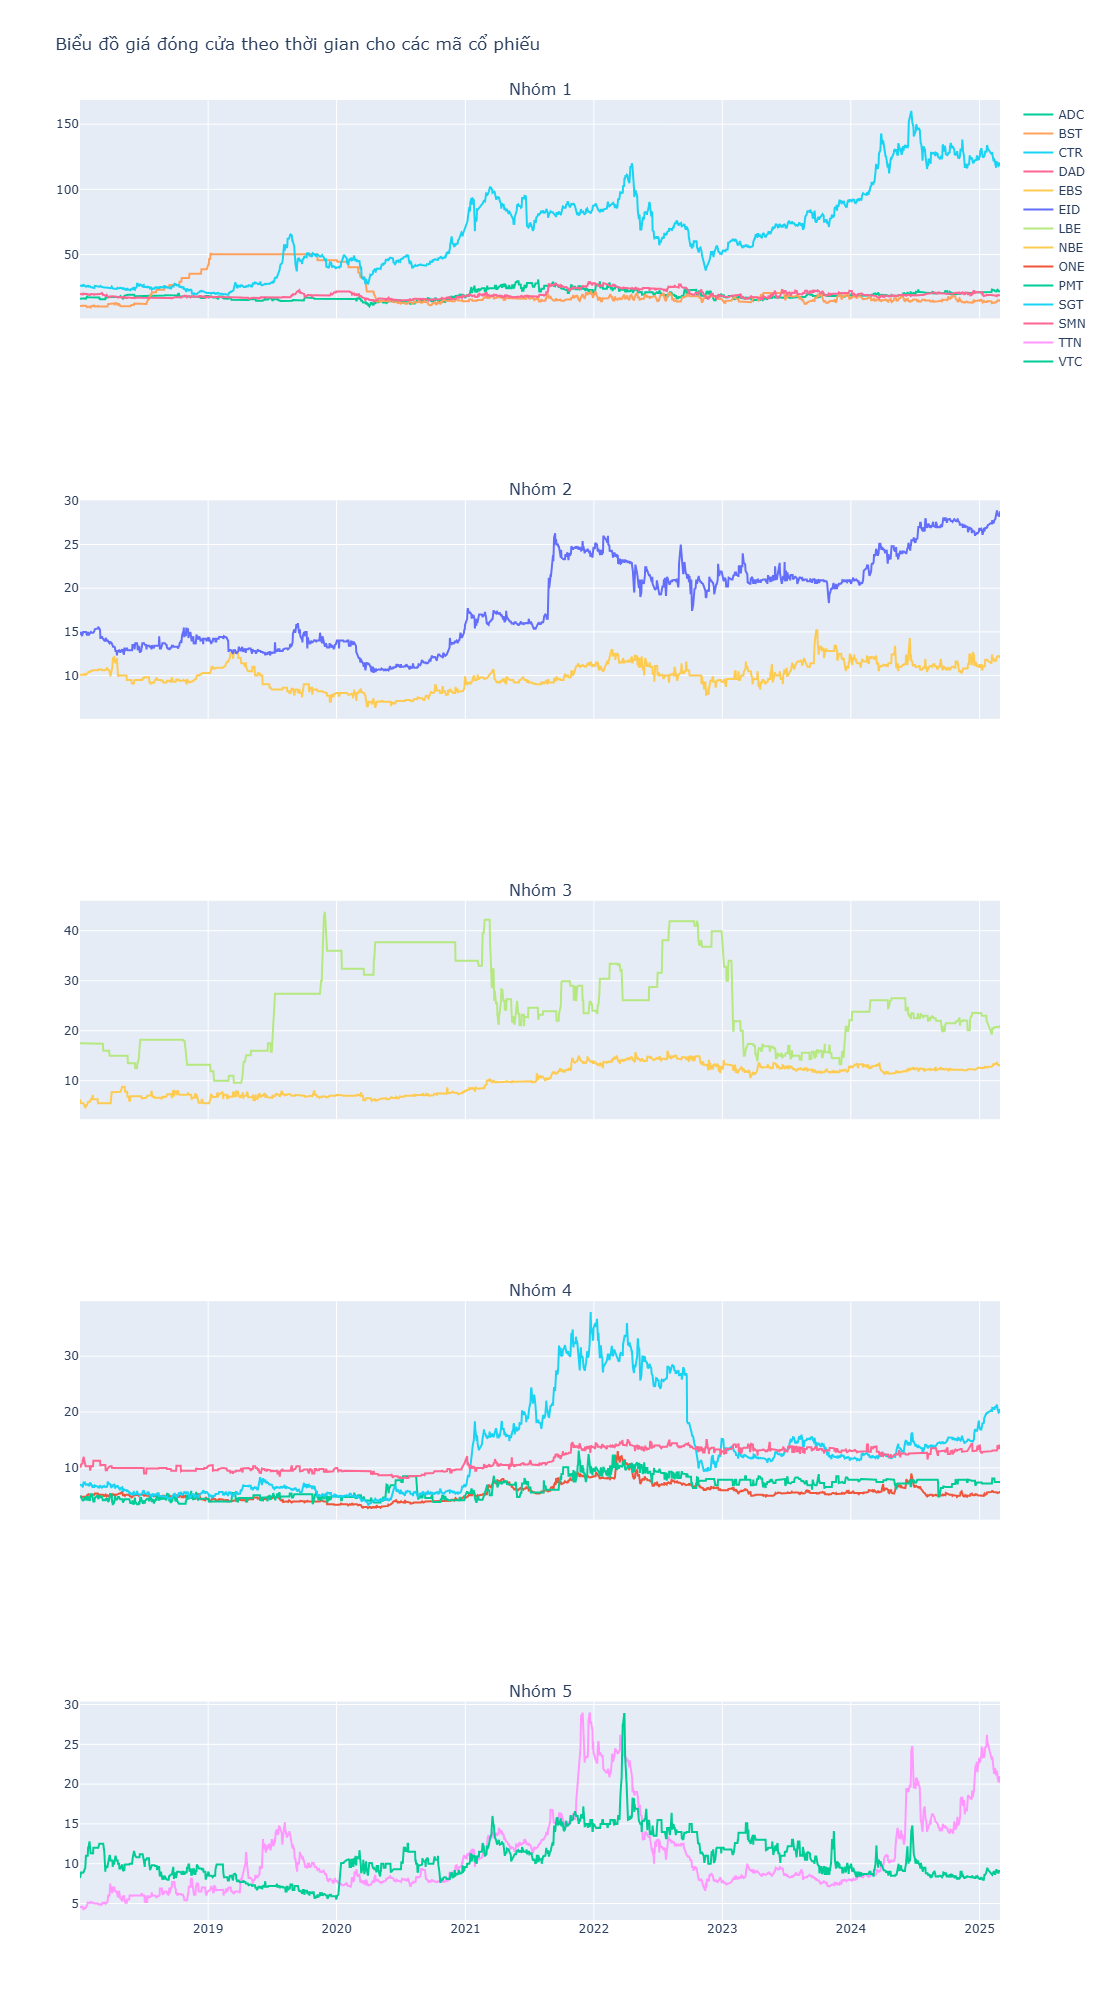

In [181]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
n_groups = 5
group_size = 7
# Tạo subplot với số hàng bằng số nhóm
fig = make_subplots(rows=n_groups, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=[f'Nhóm {i+1}' for i in range(n_groups)])

# Chia mã cổ phiếu thành các nhóm và vẽ biểu đồ
for i in range(n_groups):
    start_idx = i * group_size
    end_idx = min(start_idx + group_size, n_stocks)
    group_stocks = stock_codes[start_idx:end_idx]
    
    # Lọc dữ liệu cho nhóm mã cổ phiếu hiện tại
    group_data = his_cost[his_cost['stock_code'].isin(group_stocks)]
    
    # Vẽ đường giá đóng cửa cho từng mã trong nhóm
    for stock in group_stocks:
        stock_data = group_data[group_data['stock_code'] == stock]
        fig.add_trace(
            go.Scatter(x=stock_data['transaction_date'], 
                       y=stock_data['closing_price'], 
                       mode='lines', 
                       name=stock),
            row=i+1, col=1
        )

# Cập nhật giao diện biểu đồ
fig.update_layout(
    height=400 * n_groups,  # Chiều cao phụ thuộc số nhóm
    width=1000,
    title_text="Biểu đồ giá đóng cửa theo thời gian cho các mã cổ phiếu",
    showlegend=True,
    hovermode='x unified'  # Hiển thị giá trị khi di chuột
)

# Hiển thị biểu đồ
fig.show()

# Bộ lọc 2 (fundamental indicators)


In [26]:
df2 = pd.read_csv(r"/home/hamornic/FinalXXX/Financial Report Processed/cstc.csv", low_memory=False, index_col=0)
df2.head(10)

Unnamed: 1       Q1  \
Chỉ số tài chính                                                         
Chỉ số tài chính - ACB                                    NaN  Q1/2007   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        VNĐ  3268.23   
Giá trị sổ sách của cổ phiếu (BVPS)                       VNĐ    18293   
Chỉ số giá thị trường trên thu nhập (P/E)                 Lần    76.49   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          Lần    14.17   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...          %    19.61   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...          %     0.76   
Chỉ số tài chính - ACB                                    NaN  Q1/2008   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        VNĐ  8308.03   
Giá trị sổ sách của cổ phiếu (BVPS)                       VNĐ    25334   

                                                         Q2       Q3       Q4  \
Chỉ số tài chính                                                                
Chỉ số tài chính - ACB                              Q2/2007  Q3/2007  Q4/2007   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  7235.17  7630.51  9491.89   
Giá trị sổ sách của cổ phiếu (BVPS)                   37997    17961    30165   
Chỉ số giá thị trường trên thu nhập (P/E)             17.44    20.18    17.28   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)        3.3     8.43     5.43   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    14.09     8.55     9.33   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...      0.8     0.58     0.74   
Chỉ số tài chính - ACB                              Q2/2008  Q3/2008  Q4/2008   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  7172.69  6815.36  7481.96   
Giá trị sổ sách của cổ phiếu (BVPS)                   26762    27932    12211   

                                                   stock_code   Năm  
Chỉ số tài chính                                                     
Chỉ số tài chính - ACB                                    ACB  2007  
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2007  
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2007  
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2007  
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2007  
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2007  
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2007  
Chỉ số tài chính - ACB                                    ACB  2008  
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2008  
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2008

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4596 entries, Chỉ số tài chính - ACB to Tỷ số Nợ vay trên Vốn chủ sở hữu
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 1  4188 non-null   object
 1   Q1          4555 non-null   object
 2   Q2          4555 non-null   object
 3   Q3          4561 non-null   object
 4   Q4          4572 non-null   object
 5   stock_code  4596 non-null   object
 6   Năm         4596 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 287.2+ KB


In [28]:
df2['fa'] = df2.index
df2.reset_index(drop=True)
df2 = df2.dropna()
df2['fa'].unique()

array(['Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)',
       'Giá trị sổ sách của cổ phiếu (BVPS)',
       'Chỉ số giá thị trường trên thu nhập (P/E)',
       'Chỉ số giá thị trường trên giá trị sổ sách (P/B)',
       'Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân (ROEA)',
       'Tỷ suất sinh lợi trên tổng tài sản bình quân (ROAA)',
       'Tỷ suất lợi nhuận gộp biên',
       'Tỷ suất sinh lợi trên doanh thu thuần',
       'Tỷ số thanh toán hiện hành (ngắn hạn)',
       'Khả năng thanh toán lãi vay', 'Tỷ số Nợ trên Tổng tài sản',
       'Tỷ số Nợ vay trên Vốn chủ sở hữu'], dtype=object)

In [29]:
df2['stock_code'].unique().size

31

In [30]:
df2.head(20)

Unnamed: 1       Q1  \
Chỉ số tài chính                                                         
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        VNĐ  3268.23   
Giá trị sổ sách của cổ phiếu (BVPS)                       VNĐ    18293   
Chỉ số giá thị trường trên thu nhập (P/E)                 Lần    76.49   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          Lần    14.17   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...          %    19.61   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...          %     0.76   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        VNĐ  8308.03   
Giá trị sổ sách của cổ phiếu (BVPS)                       VNĐ    25334   
Chỉ số giá thị trường trên thu nhập (P/E)                 Lần    11.11   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          Lần        0   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...          %     6.79   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...          %     0.47   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        VNĐ   5581.8   
Giá trị sổ sách của cổ phiếu (BVPS)                       VNĐ    11851   
Chỉ số giá thị trường trên thu nhập (P/E)                 Lần     5.23   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          Lần        0   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...          %      4.7   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...          %      0.3   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        VNĐ  3269.66   
Giá trị sổ sách của cổ phiếu (BVPS)                       VNĐ    11956   

                                                         Q2       Q3       Q4  \
Chỉ số tài chính                                                                
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  7235.17  7630.51  9491.89   
Giá trị sổ sách của cổ phiếu (BVPS)                   37997    17961    30165   
Chỉ số giá thị trường trên thu nhập (P/E)             17.44    20.18    17.28   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)        3.3     8.43     5.43   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...    14.09     8.55     9.33   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...      0.8     0.58     0.74   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  7172.69  6815.36  7481.96   
Giá trị sổ sách của cổ phiếu (BVPS)                   26762    27932    12211   
Chỉ số giá thị trường trên thu nhập (P/E)              6.68     7.48     3.73   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        0        0   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...     6.66     4.15    13.42   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     0.45     0.28      0.9   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  4995.76  4509.77  3317.09   
Giá trị sổ sách của cổ phiếu (BVPS)                   11927    12786    12917   
Chỉ số giá thị trường trên thu nhập (P/E)              9.81    10.29    11.21   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          0        0        0   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...     9.07      5.7     6.56   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...     0.51     0.33     0.38   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)   3333.4  3146.81   3365.4   
Giá trị sổ sách của cổ phiếu (BVPS)                   12407    13282    12137   

                                                   stock_code   Năm  \
Chỉ số tài chính                                                      
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2007   
Giá trị sổ sách của cổ phiếu (BVPS)                       ACB  2007   
Chỉ số giá thị trường trên thu nhập (P/E)                 ACB  2007   
Chỉ số giá thị trường trên giá trị sổ sách (P/B)          ACB  2007   
Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân...        ACB  2007   
Tỷ suất sinh lợi trên tổng tài sản bình quân (R...        ACB  2007   
Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)        ACB  2008   


In [31]:
df2 = df2.reset_index()
df2 = df2.drop(columns =['Chỉ số tài chính','Unnamed: 1'])

In [32]:
# Giả sử df2 đã được load
# Trích xuất nội dung trong dấu ngoặc
df2['fa_extracted'] = df2['fa'].str.extract(r'\((.*?)\)')

# Chỉ giữ lại những dòng có giá trị được trích xuất (không phải NaN)
df2 = df2[df2['fa_extracted'].notna()].copy()

# Gán lại cột 'fa' bằng giá trị trong 'fa_extracted'
df2['fa'] = df2['fa_extracted']

# Loại bỏ cột tạm 'fa_extracted'
df2 = df2.drop(columns=['fa_extracted'])

# Kiểm tra kết quả
df2['fa'].unique()

array(['EPS', 'BVPS', 'P/E', 'P/B', 'ROEA', 'ROAA', 'ngắn hạn'],
      dtype=object)

In [33]:
import pandas as pd

# Giả sử df2 là DataFrame ban đầu
# Bỏ cột 'Unnamed: 1'
#df2 = df2.drop(columns=['Unnamed: 1'])

# Ép các cột Q1, Q2, Q3, Q4 sang kiểu float
for col in ['Q1', 'Q2', 'Q3', 'Q4']:
    df2[col] = df2[col].astype(float)

# Tạo cột year_ind bằng cách cộng 4 cột Q1 -> Q4
df2['year_ind'] = df2[['Q1', 'Q2', 'Q3', 'Q4']].sum(axis=1)

# Đổi tên cột 'Năm' thành 'year' và chuyển sang kiểu datetime theo định dạng năm
df2 = df2.rename(columns={'Năm': 'year'})
df2['year'] = pd.to_datetime(df2['year'], format='%Y')

# Lọc dữ liệu trong khoảng từ 2018 đến 2022 (nếu cần)
df2_filtered = df2[(df2['year'] >= '2018-01-01') & (df2['year'] <= '2022-12-31')]

# Nếu bạn muốn group theo 'year' và 'stock_code' (có thể thêm cả index nếu cần, 
# nhưng thường group theo các cột này là đủ)
grouped = df2_filtered.groupby(['stock_code','fa'], as_index=False)['year_ind'].mean()

# Bỏ các cột Q1, Q2, Q3, Q4 nếu không cần thiết nữa
grouped = grouped.drop(columns=[], errors='ignore')  # Ở đây chúng ta không có Q1-Q4 vì chỉ giữ year_ind và các key

# Hiển thị kết quả
print(grouped.head(20))


   stock_code        fa   year_ind
0         ACB      BVPS  67688.592
1         ACB       EPS  16799.948
2         ACB       P/B      6.866
3         ACB       P/E     28.406
4         ACB      ROAA      1.962
5         ACB      ROEA     25.600
6         BCM      BVPS  59815.334
7         BCM       EPS  45815.392
8         BCM       P/B     11.014
9         BCM       P/E     87.188
10        BCM      ROAA      4.026
11        BCM      ROEA     12.954
12        BCM  ngắn hạn      5.702
13        BID      BVPS  73736.138
14        BID       EPS   9707.034
15        BID       P/B      8.352
16        BID       P/E     65.190
17        BID      ROAA      0.656
18        BID      ROEA     13.846
19        BSR      BVPS  92107.206


In [34]:
import pandas as pd

# Giả sử df2 đã được load
# 1. Lọc bỏ các dòng có df2['fa'] = 'ngắn hạn'
df2_filtered = df2[df2['fa'] != 'ngắn hạn'].copy()

# 2. Kiểm tra với mỗi stock_code xem df2['fa'] có đủ giá trị của danh sách yêu cầu không
required_set = set(['EPS', 'BVPS', 'P/E', 'P/B', 'ROEA', 'ROAA'])
missing_fa = {}  # Dictionary để lưu các stock_code thiếu chỉ số

for stock in df2_filtered['stock_code'].unique():
    fa_values = set(df2_filtered.loc[df2_filtered['stock_code'] == stock, 'fa'].unique())
    missing = required_set - fa_values
    if missing:
        missing_fa[stock] = missing

print("Các mã cổ phiếu thiếu các chỉ số tài chính:")
print(missing_fa)
# Nếu cần, bạn có thể lọc bỏ các stock_code không đủ các chỉ số:
# valid_stocks = [stock for stock in df2_filtered['stock_code'].unique() if stock not in missing_fa]
# df2_filtered = df2_filtered[df2_filtered['stock_code'].isin(valid_stocks)]

# 3. Tạo các cột mới theo yêu cầu với giá trị là year_ind, groupBy theo stock_code
# Pivot table: chỉ lấy các dòng có fa thuộc required_set, dùng hàm mean cho cột 'year_ind'
pivoted = df2_filtered[df2_filtered['fa'].isin(required_set)].pivot_table(
    index='stock_code',
    columns='fa',
    values='year_ind',
    aggfunc='mean'
)

# 4. Kiểm tra NaN trong các cột
print("Kết quả pivot (các chỉ số tài chính):")
print(pivoted.head())

print("Số lượng giá trị NaN ở mỗi cột:")



Các mã cổ phiếu thiếu các chỉ số tài chính:
{}
Kết quả pivot (các chỉ số tài chính):
fa                  BVPS           EPS        P/B         P/E      ROAA  \
stock_code                                                                
ACB         64781.812778  14091.390556   4.751667   68.764444  1.503889   
BCM         60162.083750  30520.293750  10.725000  118.556250  4.144286   
BID         61617.474000   8450.375333   5.359333   38.032667  0.766000   
BSR         76900.253750  11846.516250   3.852500   63.787500  6.938333   
CMG         66980.521333   6173.522667   3.728000   61.494667  3.876667   

fa               ROEA  
stock_code             
ACB         21.636111  
BCM         12.765714  
BID         14.756667  
BSR         11.603333  
CMG          9.326667  
Số lượng giá trị NaN ở mỗi cột:


In [35]:
pivoted

fa                   BVPS           EPS        P/B          P/E       ROAA  \
stock_code                                                                   
ACB          64781.812778  14091.390556   4.751667    68.764444   1.503889   
BCM          60162.083750  30520.293750  10.725000   118.556250   4.144286   
BID          61617.474000   8450.375333   5.359333    38.032667   0.766000   
BSR          76900.253750  11846.516250   3.852500    63.787500   6.938333   
CMG          66980.521333   6173.522667   3.728000    61.494667   3.876667   
CMT          62127.578000   4776.183000   0.471000  -138.004000   4.290000   
CST          81314.308000  18860.994000   3.500000    14.446667   6.800000   
CTG          71910.259375  10469.397500   5.335625    38.841875   1.058125   
FPT          94234.014211  24525.523158  13.594211    63.593158  11.787368   
HGM          78916.937500  27836.343750   5.916875    85.683125  29.261250   
ITD          68608.922857   5912.340000   2.015714    46.125000   3.726429   
KBC          81318.088889   8151.990000   6.062222    94.988889   5.865294   
KDH          81892.778125   5833.623125   5.933125    48.702500   4.714375   
KSF          82586.717500   4919.983333   9.700000   256.396667   2.456667   
LPB          51242.979091   7458.037273   2.847273    16.734545   1.167778   
MBB          64807.115000  11887.022857   4.398571    25.515000   1.847857   
MVB          63553.698889   7025.802222   3.061111   206.416667   5.873750   
PIA          64306.352857  16546.424286   6.817143    27.615714  18.954286   
POT          62250.359474   3968.601579   1.991579   109.449474   2.371579   
PVD         116035.485789  13605.661579   8.870000  1575.703158   5.842632   
PVS          90251.058333  11062.615556   1.790556    60.180556   4.753889   
SQC          33140.081875   -334.287500  16.181250 -1547.568750  -1.684667   
SSH          45934.272000   6627.505000  19.973333   206.226667   4.822500   
TCB          89745.508462  12879.479231   2.806154    15.875385   2.034615   
TMB          97029.281111  25430.505556   3.092222    49.120000   4.206667   
VCB          86516.356111  15646.844444  10.662222    64.101111   1.465556   
VHM         113099.811111  24999.382222   8.760000    34.254444  10.880000   
VIC          96977.636667   9938.267222  13.280556   140.039444   4.656667   
VPB          67799.139231  11693.397692   3.455385    19.877692   1.926154   
VRE          48490.087778   4076.701111   7.031111    92.528889   6.905714   
VTB          69539.157895   6078.672632   4.410526    80.437368   5.293158   

fa               ROEA  
stock_code             
ACB         21.636111  
BCM         12.765714  
BID         14.756667  
BSR         11.603333  
CMG          9.326667  
CMT          8.929000  
CST         23.622000  
CTG         16.058125  
FPT         27.380000  
HGM         35.244375  
ITD          8.513571  
KBC         10.050000  
KDH          8.236875  
KSF          5.470000  
LPB         17.104444  
MBB         19.049286  
MVB         12.508750  
PIA         28.140000  
POT          6.956316  
PVD         15.537895  
PVS         14.890556  
SQC         -2.035333  
SSH         13.382500  
TCB         15.166923  
TMB         25.592222  
VCB         18.986667  
VHM         29.013750  
VIC         15.041667  
VPB         18.727692  
VRE          9.007143  
VTB          8.963684

In [36]:
import pandas as pd

# Giả sử pivoted_df là DataFrame có index là stock_code và các cột chỉ số tài chính:
# ['BVPS', 'EPS', 'P/E', 'P/B', 'ROAA', 'ROEA']
# Reset index để có cột 'stock_code'
df = pivoted.reset_index()

# Danh sách các cột chỉ số
indicator_cols = ['BVPS', 'EPS', 'P/E', 'P/B', 'ROAA', 'ROEA']

# Số lượng rank tùy chỉnh (ví dụ 5)
n_ranks = df['stock_code'].unique().size

# Tạo các cột rank cho từng chỉ số. Chú ý: dùng pd.qcut để phân chia thành n_ranks nhóm
# Mặc định, pd.qcut xếp thứ hạng từ thấp đến cao, do đó nếu muốn "số cao hơn => rank cao hơn"
# ta có thể đảo ngược thứ tự giá trị bằng cách sử dụng ascending=False hoặc sau đó trừ đi giá trị.
# Ở đây, mình dùng pd.qcut và sau đó chuyển các giá trị về kiểu số (int)
for col in indicator_cols:
    # Sử dụng duplicates='drop' để tránh lỗi khi có quá nhiều giá trị trùng lặp
    try:
        df[col + '_rank'] = pd.qcut(df[col], q=n_ranks, labels=range(1, n_ranks+1), duplicates='drop')
    except Exception as e:
        print(f"Lỗi ở cột {col} với qcut: {e}")
        # Nếu qcut không được, dùng phương pháp rank (với rank cao hơn cho giá trị cao hơn)
        df[col + '_rank'] = df[col].rank(method='dense', ascending=False)
        
    # Nếu cần đảo ngược thứ tự để đảm bảo giá trị cao hơn nhận rank cao hơn,
    # có thể làm như sau:
    # df[col + '_rank'] = n_ranks + 1 - df[col + '_rank']
    
    # Ép kiểu rank về int
    df[col + '_rank'] = df[col + '_rank'].astype(int)

# Tính tổng rank (total_rank) bằng cách cộng các cột rank của từng chỉ số
rank_cols = [col + '_rank' for col in indicator_cols]
df['total_rank'] = df[rank_cols].sum(axis=1)

# Kiểm tra số lượng giá trị NaN trong dataframe
print("Số lượng NaN theo cột:")
print(df.isna().sum())

# Hiển thị kết quả
print("Kết quả với các cột ranking và tổng rank:")
print(df[['stock_code'] + indicator_cols + rank_cols + ['total_rank']].head())


Số lượng NaN theo cột:
fa
stock_code    0
BVPS          0
EPS           0
P/B           0
P/E           0
ROAA          0
ROEA          0
BVPS_rank     0
EPS_rank      0
P/E_rank      0
P/B_rank      0
ROAA_rank     0
ROEA_rank     0
total_rank    0
dtype: int64
Kết quả với các cột ranking và tổng rank:
fa stock_code          BVPS           EPS         P/E        P/B      ROAA  \
0         ACB  64781.812778  14091.390556   68.764444   4.751667  1.503889   
1         BCM  60162.083750  30520.293750  118.556250  10.725000  4.144286   
2         BID  61617.474000   8450.375333   38.032667   5.359333  0.766000   
3         BSR  76900.253750  11846.516250   63.787500   3.852500  6.938333   
4         CMG  66980.521333   6173.522667   61.494667   3.728000  3.876667   

fa       ROEA  BVPS_rank  EPS_rank  P/E_rank  P/B_rank  ROAA_rank  ROEA_rank  \
0   21.636111         11        23        20        15          6         25   
1   12.765714          5        31        26        27         14 

## Sau khi ranking

In [37]:
df

fa stock_code           BVPS           EPS        P/B          P/E       ROAA  \
0         ACB   64781.812778  14091.390556   4.751667    68.764444   1.503889   
1         BCM   60162.083750  30520.293750  10.725000   118.556250   4.144286   
2         BID   61617.474000   8450.375333   5.359333    38.032667   0.766000   
3         BSR   76900.253750  11846.516250   3.852500    63.787500   6.938333   
4         CMG   66980.521333   6173.522667   3.728000    61.494667   3.876667   
5         CMT   62127.578000   4776.183000   0.471000  -138.004000   4.290000   
6         CST   81314.308000  18860.994000   3.500000    14.446667   6.800000   
7         CTG   71910.259375  10469.397500   5.335625    38.841875   1.058125   
8         FPT   94234.014211  24525.523158  13.594211    63.593158  11.787368   
9         HGM   78916.937500  27836.343750   5.916875    85.683125  29.261250   
10        ITD   68608.922857   5912.340000   2.015714    46.125000   3.726429   
11        KBC   81318.088889   8151.990000   6.062222    94.988889   5.865294   
12        KDH   81892.778125   5833.623125   5.933125    48.702500   4.714375   
13        KSF   82586.717500   4919.983333   9.700000   256.396667   2.456667   
14        LPB   51242.979091   7458.037273   2.847273    16.734545   1.167778   
15        MBB   64807.115000  11887.022857   4.398571    25.515000   1.847857   
16        MVB   63553.698889   7025.802222   3.061111   206.416667   5.873750   
17        PIA   64306.352857  16546.424286   6.817143    27.615714  18.954286   
18        POT   62250.359474   3968.601579   1.991579   109.449474   2.371579   
19        PVD  116035.485789  13605.661579   8.870000  1575.703158   5.842632   
20        PVS   90251.058333  11062.615556   1.790556    60.180556   4.753889   
21        SQC   33140.081875   -334.287500  16.181250 -1547.568750  -1.684667   
22        SSH   45934.272000   6627.505000  19.973333   206.226667   4.822500   
23        TCB   89745.508462  12879.479231   2.806154    15.875385   2.034615   
24        TMB   97029.281111  25430.505556   3.092222    49.120000   4.206667   
25        VCB   86516.356111  15646.844444  10.662222    64.101111   1.465556   
26        VHM  113099.811111  24999.382222   8.760000    34.254444  10.880000   
27        VIC   96977.636667   9938.267222  13.280556   140.039444   4.656667   
28        VPB   67799.139231  11693.397692   3.455385    19.877692   1.926154   
29        VRE   48490.087778   4076.701111   7.031111    92.528889   6.905714   
30        VTB   69539.157895   6078.672632   4.410526    80.437368   5.293158   

fa       ROEA  BVPS_rank  EPS_rank  P/E_rank  P/B_rank  ROAA_rank  ROEA_rank  \
0   21.636111         11        23        20        15          6         25   
1   12.765714          5        31        26        27         14         13   
2   14.756667          6        14        10        17          2         15   
3   11.603333         18        19        18        12         27         11   
4    9.326667         13         9        16        11         13          9   
5    8.929000          7         4         2         1         16          6   
6   23.622000         20        26         3        10         25         26   
7   16.058125         17        16        11        16          3         20   
8   27.380000         27        27        17        29         29         28   
9   35.244375         19        30        22        18         31         31   
10   8.513571         15         7        12         4         12          5   
11  10.050000         21        13        24        20         23         10   
12   8.236875         22         6        13        19         18          4   
13   5.470000         23         5        30        25         11          2   
14  17.104444          4        12         5         6          4         21   
15  19.049286         12        20         7        13          7         24   
16  12.508750          9        11        29   

Kết quả sau khi chuẩn hóa và sắp xếp:
fa stock_code  total_rank  total_rank_normalized
21        SQC          35                      1
5         CMT          36                      2
18        POT          51                      3
14        LPB          52                      4
10        ITD          55                      5


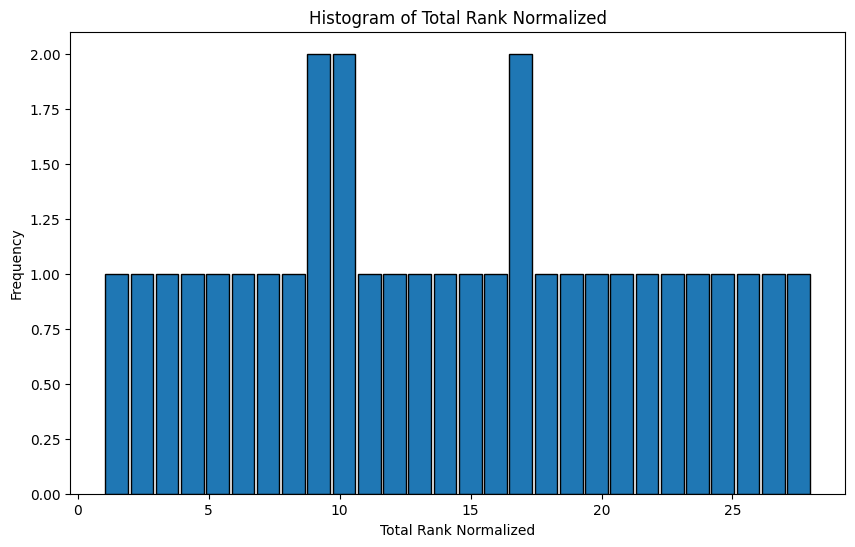

In [38]:
import matplotlib.pyplot as plt

# Bước 1: Chuẩn hóa cột total_rank thành giá trị từ 1 đến số lượng unique
unique_total = sorted(df['total_rank'].unique())
mapping = {old_val: new_val for new_val, old_val in enumerate(unique_total, start=1)}
df['total_rank_normalized'] = df['total_rank'].map(mapping)

# Bước 2: Sắp xếp DataFrame theo total_rank_normalized tăng dần
df_sorted = df.sort_values(by='total_rank_normalized')
print("Kết quả sau khi chuẩn hóa và sắp xếp:")
print(df_sorted[['stock_code', 'total_rank', 'total_rank_normalized']].head())

# Bước 3: Vẽ histogram cho total_rank_normalized
plt.figure(figsize=(10, 6))
plt.hist(df['total_rank_normalized'], bins=len(unique_total), edgecolor='k', rwidth=0.9)
plt.xlabel('Total Rank Normalized')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rank Normalized')
plt.show()


In [39]:
df['total_rank_normalized'].max()

np.int64(28)

## Tiền xử lý Báo cáo tài chính + linh tinh(Phần này chắc bỏ k dùng đến)

In [164]:
df1 = pd.read_csv(r"D:\Datasets\Data_Final\balance_fi.csv", low_memory=False, index_col=0)
df1

account value
report_id                                                        
ABCBCTKQ12010                                          cash   NaN
ABCBCTKQ12010                              cash_equivalents   NaN
ABCBCTKQ12010                            trading_securities   NaN
ABCBCTKQ12010  provision_for_trading_securities_devaluation   NaN
ABCBCTKQ12010                  held_to_maturity_investments   NaN
...                                                     ...   ...
TLCBCTKQ42024                undistributed_profit_after_tax   NaN
TLCBCTKQ42024               construction_investment_capital   NaN
TLCBCTKQ42024                     non_controlling_interests   NaN
TLCBCTKQ42024                               funding_sources   NaN
TLCBCTKQ42024              funding_sources_for_fixed_assets   NaN

[209880 rows x 2 columns]

In [165]:
df1.isna().sum()

account         0
value      168865
dtype: int64

In [166]:
df1 = df1.dropna()

In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41015 entries, ABCBCTKQ22016 to TLCBCTKQ42010
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   account  41015 non-null  object
 1   value    41015 non-null  object
dtypes: object(2)
memory usage: 961.3+ KB


In [168]:

# Giả sử df1 đang có index là report_id, chuyển nó thành cột bình thường
df1["report_id"] = df1.index

# Reset index để loại bỏ index cũ
df1 = df1.reset_index(drop=True)

# Loại bỏ các dòng có giá trị NaN
df1 = df1.dropna()

# Tách cột 'report_id' thành 'stock_code' và 'year'
df1["stock_code"] = df1["report_id"].str[:3]  # Lấy 3 ký tự đầu làm stock_code
df1["year"] = df1["report_id"].str[-4:].astype(int)  # Lấy 4 ký tự cuối làm year, chuyển thành int

# Loại bỏ cột 'report_id'
df1 = df1.drop(columns=["report_id"])

# Chuyển đổi 'year' về kiểu datetime (năm)
df1["year"] = pd.to_datetime(df1["year"], format="%Y")
df1




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26020\3219948119.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



account            value stock_code  \
0                                          cash  124,270,715,492        ABC   
1                              cash_equivalents   50,000,000,000        ABC   
2                  held_to_maturity_investments  300,871,000,000        ABC   
3         short_term_receivables_from_customers  433,267,245,264        ABC   
4      short_term_advance_payments_to_suppliers    5,871,826,658        ABC   
...                                         ...              ...        ...   
41010                   bonus_and_welfare_funds      241,196,145        TLC   
41011                  other_long_term_payables      250,000,000        TLC   
41012                             share_premium   91,000,000,000        TLC   
41013               development_investment_fund   11,718,534,049        TLC   
41014            undistributed_profit_after_tax  -37,264,345,371        TLC   

            year  
0     2016-01-01  
1     2016-01-01  
2     2016-01-01  
3     2016-01-01  
4     2016-01-01  
...          ...  
41010 2010-01-01  
41011 2010-01-01  
41012 2010-01-01  
41013 2010-01-01  
41014 2010-01-01  

[41015 rows x 4 columns]

In [169]:

# Chuyển đổi 'value' về kiểu số
df1["value"] = df1["value"].str.replace(",", "", regex=True).astype(float)
df1

account         value stock_code  \
0                                          cash  1.242707e+11        ABC   
1                              cash_equivalents  5.000000e+10        ABC   
2                  held_to_maturity_investments  3.008710e+11        ABC   
3         short_term_receivables_from_customers  4.332672e+11        ABC   
4      short_term_advance_payments_to_suppliers  5.871827e+09        ABC   
...                                         ...           ...        ...   
41010                   bonus_and_welfare_funds  2.411961e+08        TLC   
41011                  other_long_term_payables  2.500000e+08        TLC   
41012                             share_premium  9.100000e+10        TLC   
41013               development_investment_fund  1.171853e+10        TLC   
41014            undistributed_profit_after_tax -3.726435e+10        TLC   

            year  
0     2016-01-01  
1     2016-01-01  
2     2016-01-01  
3     2016-01-01  
4     2016-01-01  
...          ...  
41010 2010-01-01  
41011 2010-01-01  
41012 2010-01-01  
41013 2010-01-01  
41014 2010-01-01  

[41015 rows x 4 columns]

In [170]:
df1.isna().sum()

account       0
value         0
stock_code    0
year          0
dtype: int64

In [171]:
# Group by theo stock_code, account, year rồi tính sum và mean cho value
df1_grouped = df1.groupby(["stock_code", "account", "year"])["value"].agg(["sum", "mean"]).reset_index()

# Sắp xếp lại theo year
df1_y = df1_grouped.sort_values(by=["stock_code","year"]).reset_index()
df1_y = df1_y.drop(columns = ['index'])
df1_y.head(20)

stock_code                                       account       year  \
0         ABC                       bonus_and_welfare_funds 2016-01-01   
1         ABC                                          cash 2016-01-01   
2         ABC                              cash_equivalents 2016-01-01   
3         ABC                                deductible_vat 2016-01-01   
4         ABC                      deferred_tax_liabilities 2016-01-01   
5         ABC                   development_investment_fund 2016-01-01   
6         ABC                  held_to_maturity_investments 2016-01-01   
7         ABC                       intangible_fixed_assets 2016-01-01   
8         ABC                                   inventories 2016-01-01   
9         ABC  investments_in_associates_and_joint_ventures 2016-01-01   
10        ABC                 investments_in_other_entities 2016-01-01   
11        ABC                    long_term_prepaid_expenses 2016-01-01   
12        ABC                     non_controlling_interests 2016-01-01   
13        ABC                            non_current_assets 2016-01-01   
14        ABC                      other_long_term_payables 2016-01-01   
15        ABC                   other_long_term_receivables 2016-01-01   
16        ABC                     other_short_term_payables 2016-01-01   
17        ABC                  other_short_term_receivables 2016-01-01   
18        ABC                         payables_to_employees 2016-01-01   
19        ABC                                 share_premium 2016-01-01   

             sum          mean  
0   4.113228e+10  1.371076e+10  
1   2.830792e+11  9.435974e+10  
2   2.215000e+11  7.383333e+10  
3   9.532193e+08  3.177398e+08  
4   1.800000e+10  6.000000e+09  
5   5.172937e+09  1.724312e+09  
6   9.350130e+11  3.116710e+11  
7   1.210700e+10  4.035667e+09  
8   2.793442e+11  9.311473e+10  
9   2.456862e+10  8.189541e+09  
10  1.950000e+09  6.500000e+08  
11  1.454020e+10  4.846734e+09  
12  3.118705e+11  1.039568e+11  
13  1.628744e+11  5.429145e+10  
14  1.544974e+09  5.149913e+08  
15  5.457806e+09  1.819269e+09  
16  9.493053e+10  3.164351e+10  
17  2.291112e+11  7.637040e+10  
18  1.414337e+10  4.714457e+09  
19  7.180924e+11  2.393642e+11

In [182]:
his_cost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24856 entries, 5585 to 164869
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   stock_code         24856 non-null  object        
 1   transaction_date   24856 non-null  datetime64[ns]
 2   closing_price      24856 non-null  float64       
 3   matched_volume     24856 non-null  float64       
 4   matched_value      24856 non-null  float64       
 5   negotiated_volume  24856 non-null  float64       
 6   negotiated_value   24856 non-null  float64       
 7   opening_price      24856 non-null  float64       
 8   highest_price      24856 non-null  float64       
 9   lowest_price       24856 non-null  float64       
 10  change             24856 non-null  float64       
 11  percent            24856 non-null  float64       
 12  daily_return       24856 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 2.7

In [184]:
his_cost = hist_cost.groupby([
    'stock_code',
    pd.Grouper(key='transaction_date', freq='W')  
]).agg({
    'closing_price': ['mean'],  
    'matched_volume': ['mean'],
    'opening_price' : ['mean'],
    'highest_price' : ['mean'],
    'lowest_price' : ['mean'],
    'daily_return' : ['mean']
    
}).reset_index()
his_cost

stock_code transaction_date closing_price matched_volume opening_price  \
                                          mean           mean          mean   
0           ADC       2018-01-07        16.075          50.25        16.075   
1           ADC       2018-01-14        16.140          20.00        16.140   
2           ADC       2018-01-21        16.080         200.80        16.080   
3           ADC       2018-01-28        17.280        1046.20        17.220   
4           ADC       2018-02-04        17.160         246.00        17.160   
...         ...              ...           ...            ...           ...   
5183        VTC       2025-01-26         9.280        5152.60         9.200   
5184        VTC       2025-02-09         8.625        4905.75         8.575   
5185        VTC       2025-02-16         8.880        1372.80         9.080   
5186        VTC       2025-02-23         9.080        4259.60         9.080   
5187        VTC       2025-03-02         9.020        2928.20         9.120   

     highest_price lowest_price daily_return  
              mean         mean         mean  
0           16.075       16.075     0.156250  
1           16.140       16.140     0.124224  
2           16.080       16.080    -0.246914  
3           17.280       17.220     1.545455  
4           17.160       17.160    -0.232558  
...            ...          ...          ...  
5183         9.360        9.040     1.602953  
5184         8.625        8.500    -1.591023  
5185         9.180        8.780    -0.166140  
5186         9.160        9.000     0.724841  
5187         9.180        8.960     0.459541  

[5188 rows x 8 columns]

In [187]:
#!pip install ta

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29421 sha256=76aa116ee48295e690f0de6e6b3d39cf1866c34b247b25352871723870654630
  Stored in directory: C:\Users\Lenovo\AppData\Local\Temp\pip-ephem-wheel-cache-6qd1olb8\wheels\5c\a1\5f\c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [198]:
import pandas as pd
import numpy as np
import ta  # Thư viện tính chỉ báo kỹ thuật

# Chuyển đổi transaction_date về dạng datetime
his_cost['transaction_date'] = pd.to_datetime(his_cost['transaction_date'])

# # Nhóm dữ liệu theo tuần
# his_cost = his_cost.groupby([
#     'stock_code', pd.Grouper(key='transaction_date', freq='W')
# ]).agg({
#     'closing_price': 'mean',  
#     'matched_volume': 'mean',
#     'opening_price': 'mean',
#     'highest_price': 'mean',
#     'lowest_price': 'mean',
#     'daily_return': 'mean'
# }).reset_index()

# Danh sách các mã cổ phiếu
list_stocks = his_cost['stock_code'].unique()
result_df = {}

for stock in list_stocks:
    data = his_cost[his_cost['stock_code'] == stock].copy()
    data['transaction_date'] = pd.to_datetime(data['transaction_date'])

    # Chỉ số log returns (r1 - r15), loại bỏ các chỉ số trùng lặp
    data['r1'] = np.log(data['closing_price'] / data['closing_price'].shift(1))
    data['r2'] = np.log(data['closing_price'].shift(1) / data['closing_price'].shift(2))
    data['r3'] = np.log(data['closing_price'].shift(2) / data['closing_price'].shift(3))
    data['r4'] = np.log(data['closing_price'].shift(3) / data['closing_price'].shift(4))
    data['r5'] = np.log(data['highest_price'] / data['opening_price'])
    data['r6'] = np.log(data['highest_price'] / data['opening_price'].shift(1))
    data['r7'] = np.log(data['highest_price'] / data['opening_price'].shift(2))
    data['r8'] = np.log(data['highest_price'] / data['opening_price'].shift(3))
    data['r9'] = np.log(data['highest_price'].shift(1) / data['opening_price'].shift(1))
    data['r10'] = np.log(data['highest_price'].shift(2) / data['opening_price'].shift(2))
    data['r11'] = np.log(data['highest_price'].shift(3) / data['opening_price'].shift(3))
    data['r12'] = np.log(data['lowest_price'] / data['opening_price'])
    data['r13'] = np.log(data['lowest_price'].shift(1) / data['opening_price'].shift(1))
    data['r14'] = np.log(data['lowest_price'].shift(2) / data['opening_price'].shift(2))
    data['r15'] = np.log(data['lowest_price'].shift(3) / data['opening_price'].shift(3))

    # Thêm các chỉ báo kỹ thuật từ thư viện ta
    data['RSI'] = ta.momentum.RSIIndicator(close=data['closing_price'].squeeze(), window=14).rsi()
    data['MACD'] = ta.trend.MACD(close=data['closing_price'].squeeze(), window_slow=26, window_fast=12, window_sign=9).macd()
    data['Signal_Line'] = ta.trend.MACD(close=data['closing_price'].squeeze(), window_slow=26, window_fast=12, window_sign=9).macd_signal()
    data['ATR'] = ta.volatility.AverageTrueRange(high=data['highest_price'].squeeze(), low=data['lowest_price'].squeeze(), close=data['closing_price'].squeeze(), window=14).average_true_range()
    data['Parabolic_SAR'] = ta.trend.PSARIndicator(high=data['highest_price'].squeeze(), low=data['lowest_price'].squeeze(), close=data['closing_price'].squeeze()).psar()
    data['SMA10'] = ta.trend.SMAIndicator(close=data['closing_price'].squeeze(), window=10).sma_indicator()
    data['EMA10'] = ta.trend.EMAIndicator(close=data['closing_price'].squeeze(), window=10).ema_indicator()
    
    # Kiểm tra và loại bỏ cột trùng lặp
    data = data.loc[:, ~data.columns.duplicated()]
    
    # Xử lý NaN và vô cực
    data = data.fillna(0)
    data = data.replace([np.inf, -np.inf], 0)

    # Lưu dữ liệu
    result_df[stock] = data

# Kết quả cuối cùng
final_df = pd.concat(result_df.values(), keys=result_df.keys(), names=['stock_code'])

In [199]:

final_df

stock_code transaction_date closing_price matched_volume  \
                                                     mean           mean   
stock_code                                                                 
ADC        0           ADC       2018-01-07        16.075          50.25   
           1           ADC       2018-01-14        16.140          20.00   
           2           ADC       2018-01-21        16.080         200.80   
           3           ADC       2018-01-28        17.280        1046.20   
           4           ADC       2018-02-04        17.160         246.00   
...                    ...              ...           ...            ...   
VTC        5183        VTC       2025-01-26         9.280        5152.60   
           5184        VTC       2025-02-09         8.625        4905.75   
           5185        VTC       2025-02-16         8.880        1372.80   
           5186        VTC       2025-02-23         9.080        4259.60   
           5187        VTC       2025-03-02         9.020        2928.20   

                opening_price highest_price lowest_price daily_return  \
                         mean          mean         mean         mean   
stock_code                                                              
ADC        0           16.075        16.075       16.075     0.156250   
           1           16.140        16.140       16.140     0.124224   
           2           16.080        16.080       16.080    -0.246914   
           3           17.220        17.280       17.220     1.545455   
           4           17.160        17.160       17.160    -0.232558   
...                       ...           ...          ...          ...   
VTC        5183         9.200         9.360        9.040     1.602953   
           5184         8.575         8.625        8.500    -1.591023   
           5185         9.080         9.180        8.780    -0.166140   
           5186         9.080         9.160        9.000     0.724841   
           5187         9.120         9.180        8.960     0.459541   

                       r1        r2  ...       r13       r14       r15  \
                                     ...                                 
stock_code                           ...                                 
ADC        0     0.000000  0.000000  ...  0.000000  0.000000  0.000000   
           1     0.004035  0.000000  ...  0.000000  0.000000  0.000000   
           2    -0.003724  0.004035  ...  0.000000  0.000000  0.000000   
           3     0.071973 -0.003724  ...  0.000000  0.000000  0.000000   
           4    -0.006969  0.071973  ...  0.000000  0.000000  0.000000   
...                   ...       ...  ...       ...       ...       ...   
VTC        5183  0.085445  0.045626  ... -0.007220 -0.004951 -0.009217   
           5184 -0.073197  0.085445  ... -0.017544 -0.007220 -0.004951   
           5185  0.029137 -0.073197  ... -0.008785 -0.017544 -0.007220   
           5186  0.022273  0.029137  ... -0.033598 -0.008785 -0.017544   
           5187 -0.006630  0.022273  ... -0.008850 -0.033598 -0.008785   

                       RSI      MACD Signal_Line       ATR Parabolic_SAR  \
                                                                           
stock_code                                                                 
ADC        0      0.000000  0.000000    0.000000  0.000000     16.075000   
           1      0.000000  0.000000    0.000000  0.000000     16.140000   
           2      0.000000  0.000000    0.000000  0.000000     16.075000   
           3      0.000000  0.000000    0.000000  0.000000     16.080000   
           4      0.000000  0.000000    0.000000  0.000000     16.080000   
...                    ...       ...         ...       ...           ...   
VTC        5183  57.752478 -0.167085   -0.268970  0.387983      8.060000   
           5184  49.186636 -0.145864   -0.244349  0.415985      8.086000   
           5185  52.161458 -0.107234   -0.216926  0.425